# Modelling and Forecasting Covid-19 Cases Using ARIMA












|Name|SNR|ANR|
|----|---|----|
|Ruxandra Cojoaca|2000136|775140|
|Barbora Písecká|2056938|263723|

## Research question (0.5 points)

Formulate the research question: what question do you want to answer in this assignment?

The aim of this paper is to make a forecast of the  evolution of the Covid-19 pandemic in four countries. The countries are selected such that we include the most affected country, the least affected one, and a range in between. The selected countries are: Romania, Italy, the Netherlands and Sweden. For this purpose, we forecast two variables: total cases and number of patients in intensive care unit (ICU). 

## Motivation (0.5 points)

Starting from Frebruary, European countries have started to impose a number of measures to reduce the Covid-19 infection rates (['BBC, 2020'](https://www.bbc.com/news/world-52103747)). These measures have both immediate and long-term consequences on economic activity (['Copenhagen Economics, 2020'](https://www.copenhageneconomics.com/dyn/resources/Publication/publicationPDF/0/530/1585835646/copenhagen-economics_economic-consequences-covid-19.pdf)). ['ING's Global Macro Outlook, 2020'](https://think.ing.com/uploads/reports/Global_Macro_Outlook_171120-FINAL.pdf) highlights the fact that the economic outlook of a country depends on the severity of the lockdowns in place. The strictness and persistence of future lockdowns will be determined by the number of Covid-19 infections, and by the number of severe Covid-19 infections. Therefore, the evolution of the number of infections is relevant for making forecasts of the economic recovery in affected countries. We aim to produce forecasts of the evolution of these variables of interest.

## Data (0.5 points)

The daily time series data on Covid-19 cases is obtained from [Our World in Data](https://ourworldindata.org/coronavirus). When reading in the comma-separated values file, date is used as index. Multiple variables are dropped in order to create a data file with relevant variables only.
The main statistical tool used for the analysis is Autoregressive Integrated Moving Average model (ARIMA). This model allows to forecast future values of a variable by using its own past values and residual errors. Forecast accuracy is assesed using Root Mean Squared Error (RMSE)
normalized by the mean.


* what statistical methods do you use with the data.

## Preview of the answers (0.5 points)

Summarize the results that you find and the answer to your research question.

## Main assumptions (0.5 points)

The main condition for making an AutoRegressive forecast and an ARMA forecast is stationarity of data. Stationarity of data means that the mean, the variance and the covariance of the data do not change over time. For this reason, before conducting the AutoRegressive analysis, we check for stationarity of the data, and in case the data is non-stationary, we perform a  transformation on the data, such that the resulting datapoints are stationary. In the case of the latter model, the ARIMA code in Python performs this transformation directly if it is needed, so we do not need to do the transformation separately. 

Secondly, for our analysis to hold, we have to assume that no additional measures against Covid-19 are introduced. Further, we also assume that no new mutations of the virus are discovered. 


## Python code (6.5 points)


Give the python code in code cells and use markdown cells to explain why you code things in this way and what the outcomes are of the code cells.

Note that the explanation of your code is at least as important as the python code itself.

Create as many python and markdown cells as you need to explain things well.

In this section, we present the code employed for making predictions of the number of total infections and number of ICU patients in the four selected countries: first we install and import the necessary packages, then we perform an initial data cleaning step, and afterwards we start with the forecasting code for each country. 

We first present the forecast for the total number of cases, then for the number of patients in ICU. Each of these forecasts is performed by making use of 2 methods. 

The first (naive) method is autoregression(AR). We chose this method because the number of infections in one day is dependant upon the number of infections during previous days. 

The second method is the ARIMA method. According to Sahai, Rath, Sood and Singh(2020) this model has been extensively used for studying time series data on infectious diseases. The authors made forecasts on the number of total Covid-19 cases for the five most affected coutries in the world: the U.S., Brazil, India, Russia and Spain. We replicate their analysis for different countries, by following the same steps they described in their paper.

The procedure described above is then repeated for the other three selected countries.

In [1]:
!pip install pmdarima
!pip install statsmodels

     |████████████████████████████████| 1.5MB 4.3MB/s 
     |████████████████████████████████| 9.5MB 16.3MB/s 
     |████████████████████████████████| 2.1MB 50.5MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.ar_model import AutoReg
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
plt.style.use('seaborn')
%matplotlib inline

In [3]:
df = pd.read_csv("owid-covid-data.csv", index_col="date", parse_dates=True)

The first step is to investigate the downloaded data - how many variables and time points are available, how do the first and last observations look like, etc.

In [ ]:
df.head(10)

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-24,AFG,Asia,Afghanistan,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2020-02-25,AFG,Asia,Afghanistan,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2020-02-26,AFG,Asia,Afghanistan,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2020-02-27,AFG,Asia,Afghanistan,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2020-02-28,AFG,Asia,Afghanistan,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2020-02-29,AFG,Asia,Afghanistan,1.0,0.0,0.143,NaN,NaN,0.0,0.026,0.000,0.004,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2020-03-01,AFG,Asia,Afghanistan,1.0,0.0,0.143,NaN,NaN,0.0,0.026,0.000,0.004,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2020-03-02,AFG,Asia,Afghanistan,1.0,0.0,0.000,NaN,NaN,0.0,0.026,0.000,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2020-03-03,AFG,Asia,Afghanistan,2.0,1.0,0.143,NaN,NaN,0.0,0.051,0.026,0.004,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [ ]:
df.tail()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-14,ZWE,Africa,Zimbabwe,25368.0,1112.0,956.143,636.0,47.0,27.143,1706.797,74.817,64.331,42.791,3.162,1.826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,263641.0,3106.0,17.738,0.209,3326.0,0.224,0.287,3.5,tests performed,NaN,NaN,NaN,NaN,NaN,87.04,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
2021-01-15,ZWE,Africa,Zimbabwe,26109.0,741.0,921.286,666.0,30.0,28.286,1756.653,49.856,61.985,44.809,2.018,1.903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,267027.0,3386.0,17.966,0.228,3418.0,0.230,0.270,3.7,tests performed,NaN,NaN,NaN,NaN,NaN,87.04,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
2021-01-16,ZWE,Africa,Zimbabwe,26881.0,772.0,911.714,683.0,17.0,28.571,1808.594,51.941,61.342,45.953,1.144,1.922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.04,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
2021-01-17,ZWE,Africa,Zimbabwe,27203.0,322.0,818.000,713.0,30.0,29.429,1830.259,21.665,55.036,47.972,2.018,1.980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.04,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
2021-01-18,ZWE,Africa,Zimbabwe,27892.0,689.0,799.286,773.0,60.0,35.000,1876.616,46.357,53.777,52.009,4.037,2.355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [ ]:
print("Shape of the dataframe is", df.shape)

Shape of the dataframe is (60894, 54)


In [4]:
df.columns

Index(['iso_code', 'continent', 'location', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred',
       'new_vaccinations_smoothed_per_million', '

Next, the variables that are not necessary for our research are dropped. The first observations of this newly created and smaller data frame are investigated, too.

In [5]:
df=df[["location", "total_cases", "icu_patients"]]

In [ ]:
df.head()

,location,total_cases,total_deaths,new_deaths,icu_patients
date,,,,,
2020-02-24,Afghanistan,1.0,NaN,NaN,NaN
2020-02-25,Afghanistan,1.0,NaN,NaN,NaN
2020-02-26,Afghanistan,1.0,NaN,NaN,NaN
2020-02-27,Afghanistan,1.0,NaN,NaN,NaN
2020-02-28,Afghanistan,1.0,NaN,NaN,NaN


In [ ]:
print("Shape of the new dataframe is", df.shape)

Shape of the new dataframe is (60894, 3)


#1.1 Romania - Total Infections

A sub-dataset is created for each individual country, strting with Romaniain order to make the data handling a bit easier.

In [6]:
dfRomania=df[df["location"] == "Romania"]
dfRomania.head()

,location,total_cases,icu_patients
date,,,
2020-02-26,Romania,1.0,NaN
2020-02-27,Romania,1.0,NaN
2020-02-28,Romania,3.0,NaN
2020-02-29,Romania,3.0,NaN
2020-03-01,Romania,3.0,NaN


In [ ]:
dfRomania.tail()

,location,total_cases,total_deaths,new_deaths,icu_patients
date,,,,,
2021-01-14,Romania,684917.0,17035.0,66.0,NaN
2021-01-15,Romania,688270.0,17098.0,63.0,NaN
2021-01-16,Romania,691488.0,17164.0,66.0,NaN
2021-01-17,Romania,693644.0,17221.0,57.0,NaN
2021-01-18,Romania,695153.0,17271.0,50.0,NaN


Next, we plot the data on total Covid-19 cases for Romania, as well the autocorrelation plot. The first line of the code makes the two graphs appear next to each other (in 1 row and 2 columns). In the following lines, we specify the ax for each graph, to decide which one appears first.

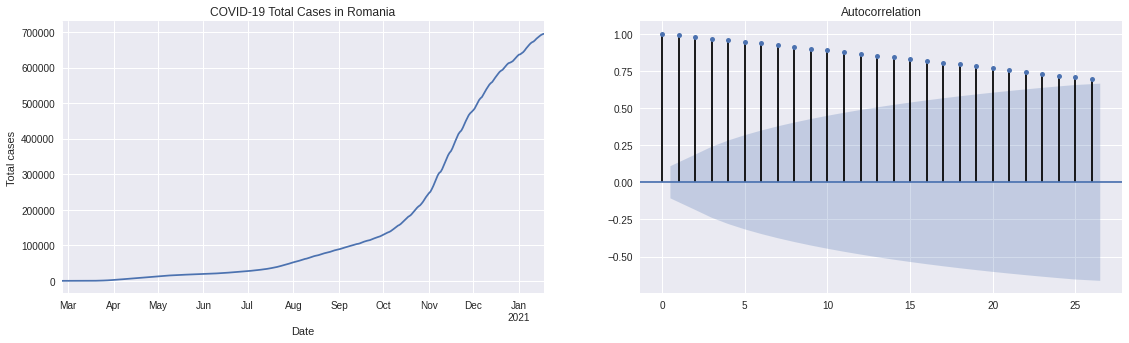

In [7]:
fig, ax = plt.subplots(1,2,figsize=(19,5)) 
dfRomania['total_cases'].plot(ax=ax[0], title='COVID-19 Total Cases in Romania', xlabel='Date', ylabel='Total cases')
sm.graphics.tsa.plot_acf(dfRomania['total_cases'], ax=ax[1])
plt.show()

To check whether the time series are stationary, Dickey-Fuller test is performed. 

In [8]:
def adf_test(dataset):    ##AIC chooses nr. of lags so the criteria is minimized
    dickeyfuller = adfuller(dataset, autolag="AIC")
    print("ADF : ", dickeyfuller[0])
    print("p-value : ", dickeyfuller[1])
    print("number of lags : ", dickeyfuller[2])
    print("number of observations used for ADF regression and critical values calculation : ", dickeyfuller[3])
    print("critical values : ")
    for key, val in dickeyfuller[4].items():
        print("\t", key, ": ", val)

In [9]:
adf_test(dfRomania['total_cases'])

ADF :  -0.7399498065607066
p-value :  0.836128553244936
number of lags :  17
number of observations used for ADF regression and critical values calculation :  310
critical values : 
	 1% :  -3.451621854687657
	 5% :  -2.870908950689806
	 10% :  -2.571761810613944


The p-value is very high, suggesting that the data is not stationary and so it needs to be differenced in order to achieve stationarity. Even though this is done automatically by "auto_arima", we still use real data for Romania to illustrate what the differencing looks like.

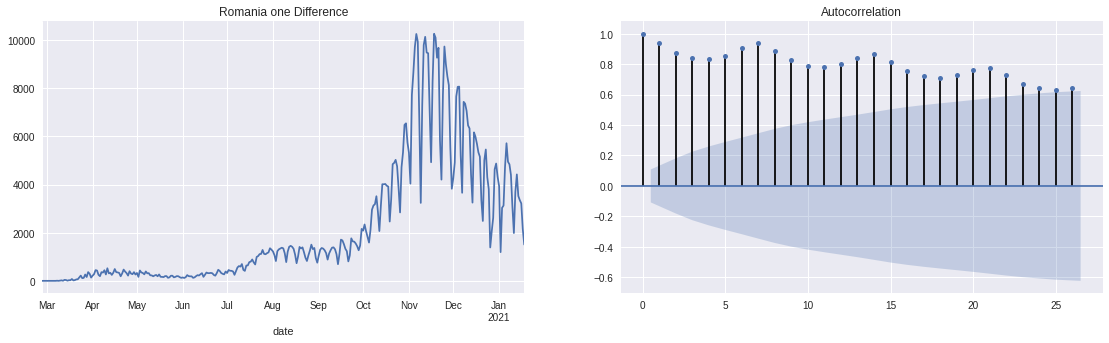

In [10]:
Romania_one_diff = (dfRomania['total_cases']).diff().dropna()
fig, ax = plt.subplots(1,2,figsize=(19,5))
sm.graphics.tsa.plot_acf(Romania_one_diff, ax=ax[1])
Romania_one_diff.plot(ax=ax[0], title='Romania one Difference')
plt.show()

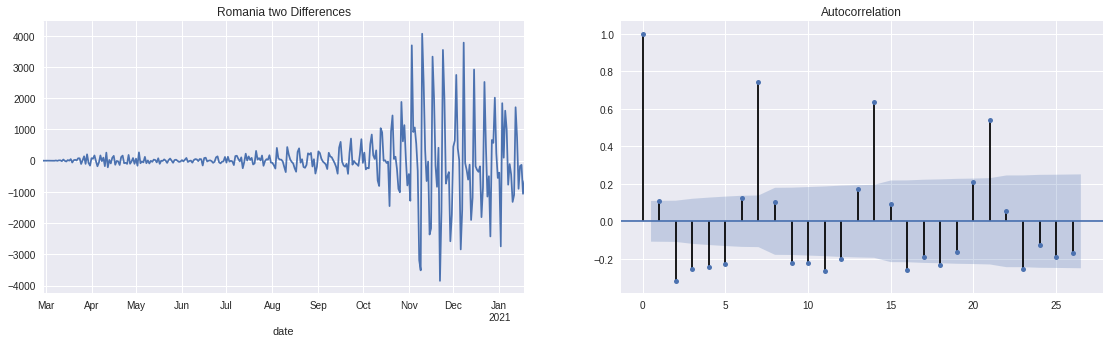

In [11]:
Romania_two_diff = (Romania_one_diff).diff().dropna()

fig, ax = plt.subplots(1,2,figsize=(19,5))
sm.graphics.tsa.plot_acf(Romania_two_diff, ax=ax[1])
Romania_two_diff.plot(ax=ax[0], title='Romania two Differences')
plt.show()

We repeat the ADF test after the two differences:

In [12]:
adf_test(Romania_two_diff)

ADF :  -3.1948288128202145
p-value :  0.020285965895697342
number of lags :  14
number of observations used for ADF regression and critical values calculation :  311
critical values : 
	 1% :  -3.451552879535732
	 5% :  -2.8708786756338407
	 10% :  -2.571745666091128


The P-value is now smaller than 0.05, so we are able to reject the null hypothesis of unit root(non-stationarity). 

In this case, two rounds of differencing fix the issue of non-stationarity. Mathematically, second-order differencing can be expressed as follows:

$$ y''_t = y'_t - y'_{t-1} $$
$$ y''_t = (y_t - y_{t-1}) - (y_{t-1} - y_{t-2}) $$
$$ y''_t = y_t - 2y_{t-1} +y_{t-2} $$

The reason why so much emphasis is put on stationarity of the used data is that it is a condition for performing the ARIMA analysis.

# AutoRegression(AR) method:

The ADF test above suggests that after two differences, the data is stationary. Stationarity is a necessary condition for using the AuroRegression method, so we will perform the forecast using the "Romania_two_diff" data.

We inspect the Partial Autocorrelation graph, in orer to determine how many past observations have an effect on a given observation. The Partial Autocorrelation coefficient captures the direct effect that a past observation has on a current observation. By contrast, the Autocorrelation coefficient captures both the direct and indirect effects. For this reason, we are more interested in the PACF graph. 

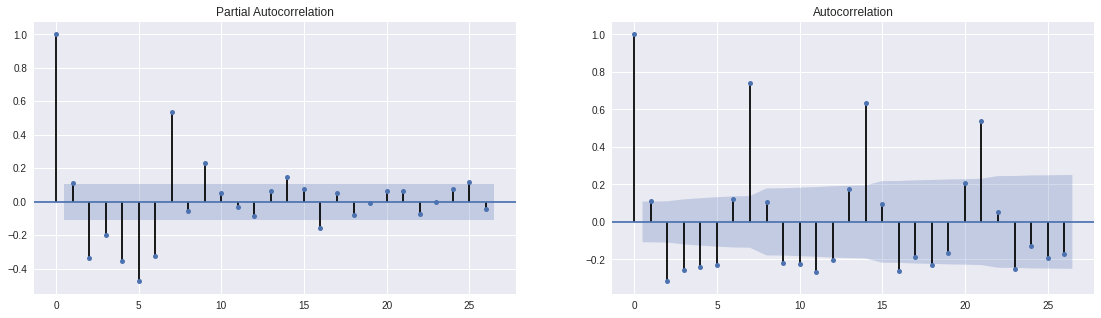

In [13]:
fig, ax = plt.subplots(1,2,figsize=(19,5))
sm.graphics.tsa.plot_pacf(Romania_two_diff, ax=ax[0])
sm.graphics.tsa.plot_acf(Romania_two_diff, ax=ax[1])
plt.show()

The PACF graph above shows that the past 9 observations have the highest effect on a current observation.  

Then we divide the data into a training and testing period:

In [14]:
Romania_train_AR = Romania_two_diff.iloc[:-15]
Romania_test_AR = Romania_two_diff.iloc[-15:]
print(Romania_two_diff.shape, Romania_train_AR.shape, Romania_test_AR.shape) # To chcek if selection was done correctly

(326,) (311,) (15,)


Then we fit the AutoRegression model to the training part of the data, using 9 lags (that correspond to the last 9 observations).

In [15]:
modelRo_AR = AutoReg(Romania_train_AR, lags=9).fit() ##i think that based on these graphs we should include seasonality
print(modelRo_AR.summary())

                            AutoReg Model Results                             
Dep. Variable:            total_cases   No. Observations:                  311
Model:                     AutoReg(9)   Log Likelihood               -2307.161
Method:               Conditional MLE   S.D. of innovations            503.040
Date:                Sat, 23 Jan 2021   AIC                             12.514
Time:                        19:38:06   BIC                             12.649
Sample:                    03-08-2020   HQIC                            12.568
                         - 01-03-2021                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         19.7381     29.131      0.678      0.498     -37.357      76.834
total_cases.L1    -0.0827      0.057     -1.462      0.144      -0.194       0.028
total_cases.L2    -0.4685      0.057

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


After inspecting the P-values of the coefficients, we observe that the first and 8th past observations are not statistically significant (the P-values are higher than 0.05). Therefore, we re-fit the model on the training section, without lags 1 and 8. 

In [16]:
modelRo_AR = AutoReg(Romania_train_AR, lags=[2,3,4,5, 6, 7, 8, 9]).fit() 
print(modelRo_AR.summary())

                            AutoReg Model Results                             
Dep. Variable:            total_cases   No. Observations:                  311
Model:              Restr. AutoReg(9)   Log Likelihood               -2308.226
Method:               Conditional MLE   S.D. of innovations            504.816
Date:                Sat, 23 Jan 2021   AIC                             12.515
Time:                        19:38:16   BIC                             12.637
Sample:                    03-08-2020   HQIC                            12.564
                         - 01-03-2021                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         18.0696     29.211      0.619      0.536     -39.183      75.323
total_cases.L2    -0.4611      0.057     -8.112      0.000      -0.573      -0.350
total_cases.L3    -0.1857      0.049

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


In [17]:
predRo_AR = modelRo_AR.predict(start = len(Romania_train_AR), end = len(Romania_two_diff)-1, dynamic=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  UserWarning,


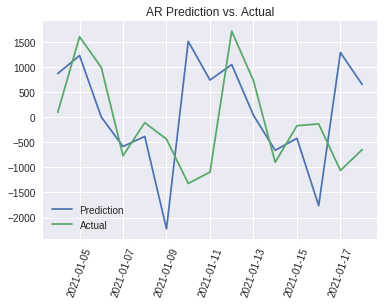

In [18]:
plt.plot(predRo_AR, label='Prediction')
plt.plot(Romania_test_AR, label='Actual')
plt.xticks(rotation=70)
plt.title('AR Prediction vs. Actual')
plt.legend()
plt.show()

The above graph suggests a bad prediction. We check this by comparing the root mean squared error to the mean of the data over the testing period.

In [19]:
rmseRo_AR = sqrt(mean_squared_error(Romania_test_AR, predRo_AR))
print('RMSE: ' + str(rmseRo_AR))
meanRo_AR = Romania_test_AR.mean()
print('Mean: ' + str(meanRo_AR))
print('Ratio RMSE over Mean: ' + str(rmseRo_AR/meanRo_AR))

RMSE: 1347.595485018652
Mean: -101.66666666666667
Ratio RMSE over Mean: -13.255037557560511


The smaller the root mean squared error is, relative to the daily mean over the testing period, the better the prediction is. In our case, this ratio is very high, confirming that the prediction is bad. For this reason, we do not continue with forecasting, but instead we turn towards the ARIMA model.  

# ARIMA Model

Now let's determine the appropriate model:

In [26]:
stepwise_fit = auto_arima(dfRomania['total_cases'], trace=True, supress_warnings=True, seasonal=True, m=7)
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[7]             : AIC=5019.916, Time=0.97 sec
 ARIMA(0,2,0)(0,0,0)[7]             : AIC=5347.020, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[7]             : AIC=5085.246, Time=0.24 sec
 ARIMA(0,2,1)(0,0,1)[7]             : AIC=5202.941, Time=0.25 sec
 ARIMA(2,2,2)(0,0,1)[7]             : AIC=5116.323, Time=1.06 sec
 ARIMA(2,2,2)(1,0,0)[7]             : AIC=5023.723, Time=0.84 sec
 ARIMA(2,2,2)(2,0,1)[7]             : AIC=5023.433, Time=1.90 sec
 ARIMA(2,2,2)(1,0,2)[7]             : AIC=5021.045, Time=2.03 sec
 ARIMA(2,2,2)(0,0,0)[7]             : AIC=5189.734, Time=0.60 sec
 ARIMA(2,2,2)(0,0,2)[7]             : AIC=5060.552, Time=1.87 sec
 ARIMA(2,2,2)(2,0,0)[7]             : AIC=5020.722, Time=1.08 sec
 ARIMA(2,2,2)(2,0,2)[7]             : AIC=inf, Time=2.95 sec
 ARIMA(1,2,2)(1,0,1)[7]             : AIC=5017.986, Time=0.74 sec
 ARIMA(1,2,2)(0,0,1)[7]             : AIC=5125.310, Time=0.36 sec
 ARIMA(1,2,2)(1,0,0)[7]             : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  328
Model:             SARIMAX(1, 2, 2)x(1, 0, [1], 7)   Log Likelihood               -2502.993
Date:                             Sat, 23 Jan 2021   AIC                           5017.986
Time:                                     19:46:50   BIC                           5040.707
Sample:                                          0   HQIC                          5027.053
                                             - 328                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2610      0.079      3.283      0.001       0.105       0.417
ma.L1         -0.3878      0.077     -5.059      0.000      -0.538      -0.238
ma.L2         -0.3774      0.045     -8.476      0.000      -0.465      -0.290
ar.S.L7        0.8256      0.023     35.279      0.000       0.780       0.871
ma.S.L7       -0.2095      0.033     -6.393      0.000      -0.274      -0.145
sigma2      2.692e+05   8394.707     32.068      0.000    2.53e+05    2.86e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1732.22
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              77.40   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Divide the data into two parts: training and testing data



In [27]:
Romania_train = dfRomania.iloc[:-15]
Romania_test = dfRomania.iloc[-15:]
print(Romania_train.shape, Romania_test.shape)

(313, 3) (15, 3)


In [28]:
import warnings ## This gets rid of the warnings that appear for the next code
warnings.filterwarnings("ignore")

In [30]:
modelRo = SARIMAX(Romania_train['total_cases'], order=(1,2,2),seasonal_order=(1,0,1,7)) 
modelRo = modelRo.fit()
modelRo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                         total_cases   No. Observations:                  313
Model:             SARIMAX(1, 2, 2)x(1, 0, [1], 7)   Log Likelihood               -2375.251
Date:                             Sat, 23 Jan 2021   AIC                           4762.501
Time:                                     19:49:36   BIC                           4784.940
Sample:                                 02-26-2020   HQIC                          4771.471
                                      - 01-03-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2811      0.075      3.772      0.000       0.135       0.427
ma.L1         -0.4006      0.072     -5.594      0.000      -0.541      -0.260
ma.L2         -0.3822      0.042     -9.010      0.000      -0.465      -0.299
ar.S.L7        0.8331      0.024     34.733      0.000       0.786       0.880
ma.S.L7       -0.1491      0.032     -4.631      0.000      -0.212      -0.086
sigma2      2.475e+05   7352.243     33.669      0.000    2.33e+05    2.62e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              2395.50
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):              65.48   Skew:                            -0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
starting_index = len(Romania_train)
ending_index = len(Romania_train) + len(Romania_test) - 1 

predictionRo = modelRo.predict(start = starting_index, end = ending_index, typ = 'levels')
predictionRo.index = dfRomania.index[starting_index : ending_index+1]
print(len(predictionRo))
print(predictionRo)
# So the starting date for the prediction is 2020-01-04, and the ending date is 2021-01-18 (the last day 
# containing data)

15
date
2021-01-04    643819.023690
2021-01-05    648277.168794
2021-01-06    652766.648388
2021-01-07    656707.311311
2021-01-08    660314.018813
2021-01-09    661789.561497
2021-01-10    664557.175535
2021-01-11    667609.829615
2021-01-12    671644.964477
2021-01-13    675732.239658
2021-01-14    679369.612722
2021-01-15    682730.823872
2021-01-16    684317.135952
2021-01-17    686980.037507
2021-01-18    689880.452110
Name: predicted_mean, dtype: float64


Now we can compare the predicted total infections with the actual total infections during the testing period. We do this first by looking at the graph, and then by comparing the root squared mean of the error to the mean of the data  

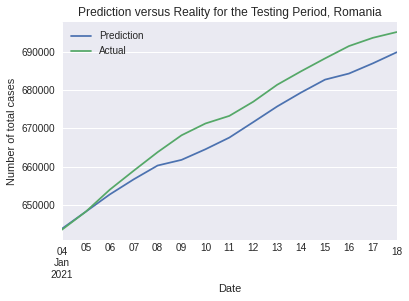

In [32]:
predictionRo.plot(label='Prediction')
Romania_test['total_cases'].plot(label='Actual')
plt.title('Prediction versus Reality for the Testing Period, Romania')
plt.ylabel('Number of total cases')
plt.xlabel('Date')
plt.legend()
plt.show()

The above graph suggests a good prediction for the testing period.

In [33]:
rmseRo = sqrt(mean_squared_error(predictionRo,Romania_test['total_cases']))
print('RMSE: ' + str(rmseRo))
meanRo = Romania_test['total_cases'].mean()
print('Mean infections: ' + str(meanRo))
print('Ratio RMSE over Mean infections: ' + str(rmseRo/meanRo))

RMSE: 5050.995287435355
Mean infections: 672880.0
Ratio RMSE over Mean infections: 0.007506532052424436


The smaller the root mean squared error is, relative to the daily mean of total infections, the better the prediction is. In our case, this ratio is very close to 0, suggesting an accurate prediction. 

Now that we know that the model performs well on the testing period, we proceed to forecast the total infections for a period of 3 months, starting from 19.01.2020. First, we re-train the model on the entire available data:

In [ ]:
modelRo2 = ARIMA(dfRomania['total_cases'], order=(5,2,2)) 
modelRo2 = modelRo2.fit()
modelRo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D2.total_cases   No. Observations:                  326
Model:                 ARIMA(5, 2, 2)   Log Likelihood               -2549.701
Method:                       css-mle   S.D. of innovations            600.008
Date:                Sat, 23 Jan 2021   AIC                           5117.402
Time:                        14:41:49   BIC                           5151.484
Sample:                    02-28-2020   HQIC                          5131.002
                         - 01-18-2021                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.7074     12.867      0.677      0.499     -16.512      33.926
ar.L1.D2.total_cases     0.4460      0.113      3.962      0.000       0.225       0.667
ar.L2.D2.total_cases    -0.8577      0.068    -12.555      0.000      -0.992      -0.724
ar.L3.D2.total_cases    -0.0871      0.092     -0.948      0.343      -0.267       0.093
ar.L4.D2.total_cases    -0.3725      0.055     -6.782      0.000      -0.480      -0.265
ar.L5.D2.total_cases    -0.3354      0.082     -4.077      0.000      -0.497      -0.174
ma.L1.D2.total_cases    -0.7753      0.113     -6.848      0.000      -0.997      -0.553
ma.L2.D2.total_cases     0.6256      0.082      7.664      0.000       0.466       0.786
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6293           -0.8009j            1.0186           -0.1440
AR.2            0.6293           +0.8009j            1.0186            0.1440
AR.3           -0.1908           -1.1872j            1.2024           -0.2754
AR.4           -0.1908           +1.1872j            1.2024            0.2754
AR.5           -1.9877           -0.0000j            1.9877           -0.5000
MA.1            0.6197           -1.1021j            1.2643           -0.1685
MA.2            0.6197           +1.1021j            1.2643            0.1685
-----------------------------------------------------------------------------
"""

In [ ]:
index_future_dates = pd.date_range(start = '2021-01-19', end = '2021-04-18')
forecast = modelRo2.predict(start = len(dfRomania), end = len(dfRomania)+89, typ = 'levels')
forecast.index = index_future_dates 
print(forecast)

2021-01-19    697893.397840
2021-01-20    701526.788067
2021-01-21    705018.711348
2021-01-22    708190.715309
2021-01-23    711041.070835
                  ...      
2021-04-14    971073.980822
2021-04-15    974791.403269
2021-04-16    978389.023590
2021-04-17    981861.616503
2021-04-18    985304.541712
Freq: D, Length: 90, dtype: float64


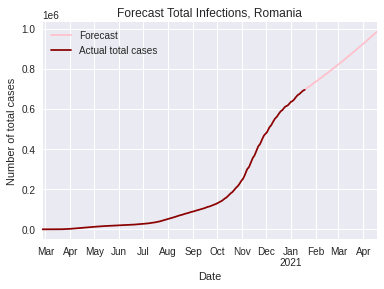

In [ ]:
forecast.plot(label = 'Forecast', color='pink')
dfRomania['total_cases'].plot(color='darkred', label = 'Actual total cases')
plt.title('Forecast Total Infections, Romania')
plt.ylabel('Number of total cases')
plt.xlabel('Date')
plt.legend()
plt.show()

# 1.2 Romania - ICU Patients

By contrast with the total number of infections, the number of patients in the Intensive Care Unit has missing datapoints. Thus, we first drop the missing values:

In [ ]:
dfRomania_ICU = dfRomania['icu_patients'].dropna()
dfRomania_ICU.head(10)
# As can be seen below, the first reported number for patients in ICU was on 2020-03-19. 

date
2020-03-19     6.0
2020-03-20    11.0
2020-03-21    14.0
2020-03-22    14.0
2020-03-23    15.0
2020-03-24    16.0
2020-03-25    18.0
2020-03-26    29.0
2020-03-28    34.0
2020-03-29    38.0
Name: icu_patients, dtype: float64

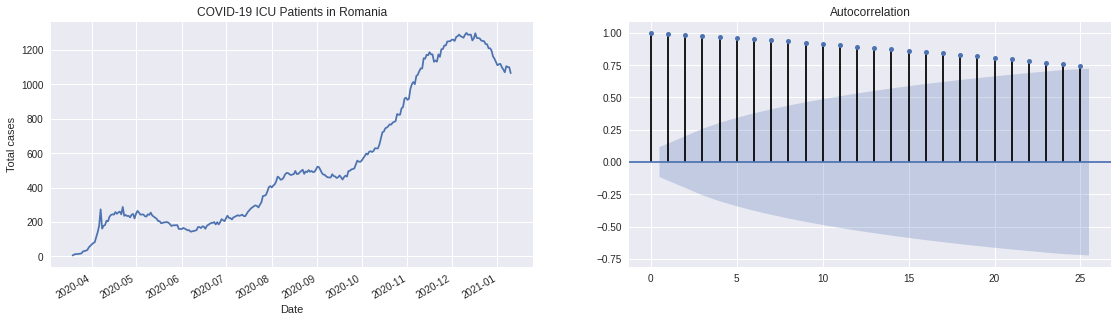

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(19,5)) 
# This code makes the two graphs appear next to each other(it will apear on 1 row, and 2 columns)
# Then we specify the ax for each graph, to decide which one appears first
dfRomania_ICU.plot(ax=ax[0], title='COVID-19 ICU Patients in Romania', xlabel='Date', ylabel='Total cases')
sm.graphics.tsa.plot_acf(dfRomania_ICU, ax=ax[1])
plt.show()

In [ ]:
adf_test(dfRomania_ICU)

ADF :  -0.859228776522667
p-value :  0.8011024012102405
number of lags :  15
number of observations used for ADF regression and critical values calculation :  269
critical values : 
	 1% :  -3.4548957220044336
	 5% :  -2.8723451788613157
	 10% :  -2.572527778361272


The p-value is very high, suggesting that the data is not stationary and so it needs to be differenced in order to achieve stationarity. Even though this is done automatically by "auto_arima", we still use real data for Romania to illustrate what the differencing looks like.

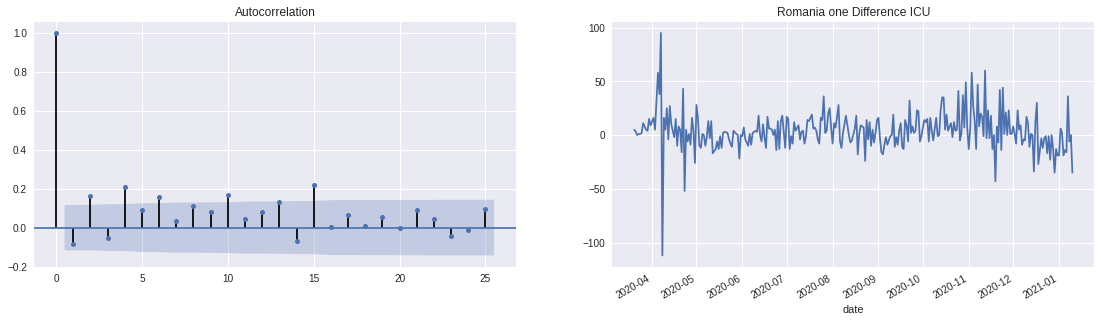

In [ ]:
Romania_one_diff_ICU = (dfRomania_ICU).diff().dropna()
fig, ax = plt.subplots(1,2,figsize=(19,5))
sm.graphics.tsa.plot_acf(Romania_one_diff_ICU, ax=ax[0])
Romania_one_diff_ICU.plot(ax=ax[1], title='Romania one Difference ICU')
plt.show()


We repeat the ADF test after one difference:

In [ ]:
adf_test(Romania_one_diff_ICU)

ADF :  -2.2715209130550686
p-value :  0.18131758802374015
number of lags :  14
number of observations used for ADF regression and critical values calculation :  269
critical values : 
	 1% :  -3.4548957220044336
	 5% :  -2.8723451788613157
	 10% :  -2.572527778361272


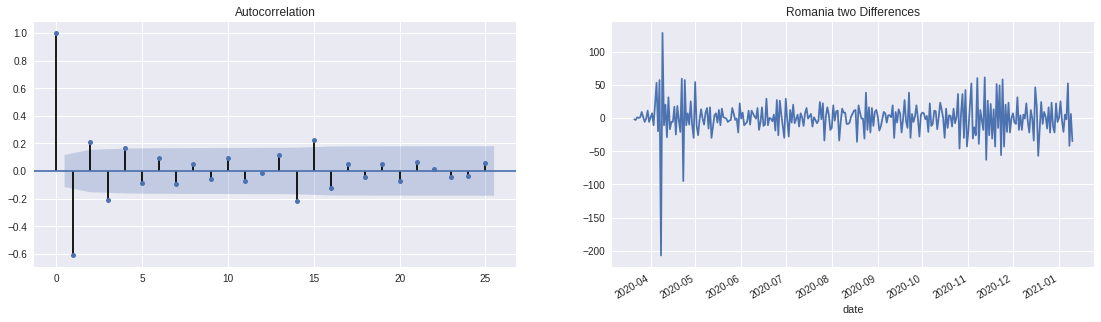

In [ ]:
Romania_two_diff_ICU = (Romania_one_diff_ICU).diff().dropna()

fig, ax = plt.subplots(1,2,figsize=(19,5))
sm.graphics.tsa.plot_acf(Romania_two_diff_ICU, ax=ax[0])
Romania_two_diff_ICU.plot(ax=ax[1], title='Romania two Differences')
plt.show()

In [ ]:
adf_test(Romania_two_diff_ICU)

ADF :  -7.808766098696655
p-value :  7.162901822236088e-12
number of lags :  13
number of observations used for ADF regression and critical values calculation :  269
critical values : 
	 1% :  -3.4548957220044336
	 5% :  -2.8723451788613157
	 10% :  -2.572527778361272


# AutoRegression Model

The ADF test above suggests that after two differences, the data is stationary. Stationarity is a necessary condition for using the AuroRegression method, so we will perform the forecast using the "Romania_two_diff_ICU" data.

We inspect the Partial Autocorrelation graph, in orer to determine how many past observations have an effect on a given observation. The Partial Autocorrelation coefficient captures the direct effect that a past observation has on a current observation. By contrast, the Autocorrelation coefficient captures both the direct and indirect effects. For this reason, we are more interested in the PACF graph.

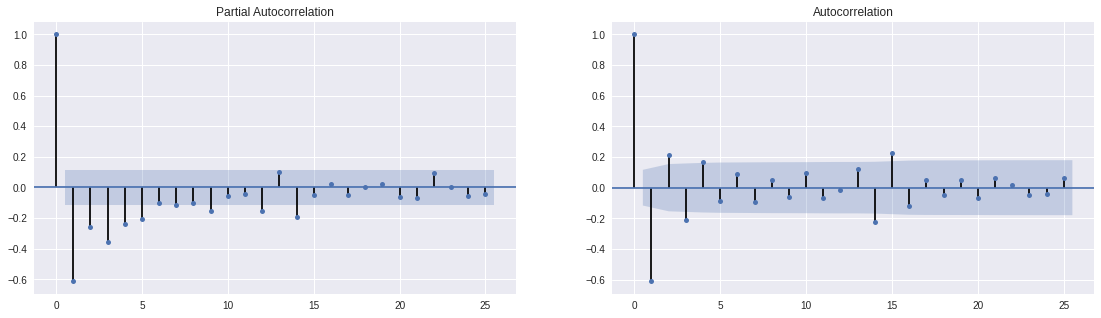

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(19,5))
sm.graphics.tsa.plot_pacf(Romania_two_diff_ICU, ax=ax[0])
sm.graphics.tsa.plot_acf(Romania_two_diff_ICU, ax=ax[1])
plt.show()

The PACF graph above shows that the past 9 observations have the highest effect on a current observation.  

Then we divide the data into a training and testing period:

In [ ]:
Romania_train_AR_ICU = Romania_two_diff_ICU.iloc[:-15]
Romania_test_AR_ICU = Romania_two_diff_ICU.iloc[-15:]
print(Romania_two_diff_ICU.shape, Romania_train_AR_ICU.shape, Romania_test_AR_ICU.shape) # To chcek if selection was done correctly

(283,) (268,) (15,)


Then we fit the AutoRegression model to the training part of the data, using 9 lags (that correspond to the last 9 observations).

In [ ]:
modelRo_AR_ICU = AutoReg(Romania_train_AR_ICU, lags=9).fit()
print(modelRo_AR_ICU.summary())

                            AutoReg Model Results                             
Dep. Variable:           icu_patients   No. Observations:                  268
Model:                     AutoReg(9)   Log Likelihood               -1106.432
Method:               Conditional MLE   S.D. of innovations             17.340
Date:                Sat, 23 Jan 2021   AIC                              5.791
Time:                        14:41:52   BIC                              5.942
Sample:                             9   HQIC                             5.852
                                  268                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          -0.3606      1.078     -0.335      0.738      -2.473       1.752
icu_patients.L1    -1.1000      0.061    -17.900      0.000      -1.220      -0.980
icu_patients.L2    -0.9807      

After inspecting the P-values of the coefficients, we observe that they are all statistically significant (the P-values are smaller than 0.05).

In [ ]:
predRo_AR_ICU = modelRo_AR_ICU.predict(start = len(Romania_train_AR_ICU), end = len(Romania_two_diff_ICU)-1, dynamic=False)
predRo_AR_ICU.index = Romania_test_AR_ICU.index

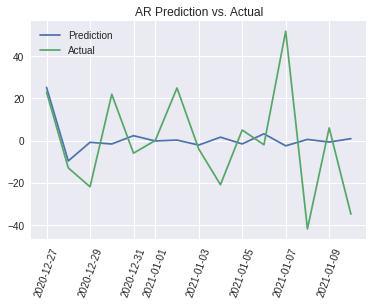

In [ ]:
plt.plot(predRo_AR_ICU, label='Prediction')
plt.plot(Romania_test_AR_ICU, label='Actual')
plt.xticks(rotation=70)
plt.title('AR Prediction vs. Actual')
plt.legend()
plt.show()

The above graph suggests a bad prediction. We check this by comparing the root mean squared error to the mean of the data over the testing period.

In [ ]:
rmseRo_AR_ICU = sqrt(mean_squared_error(Romania_test_AR_ICU, predRo_AR_ICU))
print('RMSE: ' + str(rmseRo_AR_ICU))
meanRo_AR_ICU = Romania_test_AR_ICU.mean()
print('Mean: ' + str(meanRo_AR_ICU))
print('Ratio RMSE over Mean: ' + str(rmseRo_AR_ICU/meanRo_AR_ICU))

RMSE: 23.671429377205552
Mean: -0.8
Ratio RMSE over Mean: -29.589286721506937


The smaller the root mean squared error is, relative to the daily mean over the testing period, the better the prediction is. In our case, this ratio is very high, confirming that the prediction is bad. For this reason, we do not continue with forecasting, but instead we turn towards the ARIMA model. 

# ARIMA Model

In [24]:
stepwise_fit = auto_arima(dfRomania_ICU, trace=True, d=2, supress_warnings=True)
stepwise_fit.summary() 
# When running the auto_arima code the first time, the best model found was ARIMA(0,1,4). However, the data becomes 
# stationary after two differences only, so when fitting the model, an error appeared. Therefore, we set d=2, and ran
# the auto_arima again

NameError: ignored

In [ ]:
Romania_train_ICU = dfRomania_ICU.iloc[:-15]
Romania_test_ICU = dfRomania_ICU.iloc[-15:]
print(dfRomania_ICU.shape, Romania_train_ICU.shape, Romania_test_ICU.shape)

(285,) (270,) (15,)


In [ ]:
modelRo_ICU = ARIMA(Romania_train_ICU, order=(0,2,4)) 
modelRo_ICU = modelRo_ICU.fit()
modelRo_ICU.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D2.icu_patients   No. Observations:                  268
Model:                 ARIMA(0, 2, 4)   Log Likelihood               -1141.385
Method:                       css-mle   S.D. of innovations             17.044
Date:                Sat, 23 Jan 2021   AIC                           2294.771
Time:                        14:41:56   BIC                           2316.317
Sample:                             2   HQIC                          2303.425
                                                                              
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0486      0.100     -0.484      0.628      -0.246       0.148
ma.L1.D2.icu_patients    -1.1173      0.061    -18.255      0.000      -1.237      -0.997
ma.L2.D2.icu_patients     0.2171      0.089      2.452      0.014       0.044       0.391
ma.L3.D2.icu_patients    -0.1573      0.084     -1.862      0.063      -0.323       0.008
ma.L4.D2.icu_patients     0.1519      0.059      2.573      0.010       0.036       0.268
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.3075           -0.0464j            1.3083           -0.0056
MA.2            1.3075           +0.0464j            1.3083            0.0056
MA.3           -0.7895           -1.7954j            1.9613           -0.3159
MA.4           -0.7895           +1.7954j            1.9613            0.3159
-----------------------------------------------------------------------------
"""

In [ ]:
starting_index = len(Romania_train_ICU)
ending_index = len(Romania_train_ICU) + len(Romania_test_ICU) - 1 

predictionRo_ICU = modelRo_ICU.predict(start = starting_index, end = ending_index, typ = 'levels')
predictionRo_ICU.index = dfRomania_ICU.index[starting_index : ending_index+1]
print(len(predictionRo_ICU))
print(predictionRo_ICU)
# So the starting date for the prediction is 2020-12-27, and the ending date is 2021-01-10 (the last day 
# containing data)

15
date
2020-12-27    1209.787620
2020-12-28    1203.316131
2020-12-29    1199.609230
2020-12-30    1193.042161
2020-12-31    1186.426456
2021-01-01    1179.762115
2021-01-02    1173.049138
2021-01-03    1166.287524
2021-01-04    1159.477275
2021-01-05    1152.618389
2021-01-06    1145.710867
2021-01-07    1138.754710
2021-01-08    1131.749916
2021-01-09    1124.696486
2021-01-10    1117.594420
dtype: float64


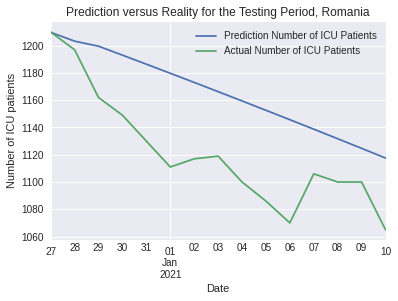

In [ ]:
predictionRo_ICU.plot(label='Prediction Number of ICU Patients')
Romania_test_ICU.plot(label='Actual Number of ICU Patients')
plt.title('Prediction versus Reality for the Testing Period, Romania')
plt.ylabel('Number of ICU patients')
plt.xlabel('Date')
plt.legend()
plt.show()

In [ ]:
rmseRo_ICU = sqrt(mean_squared_error(predictionRo_ICU,Romania_test_ICU))
print('RMSE: ' + str(rmseRo_ICU))
meanRo_ICU = Romania_test_ICU.mean()
print('Mean number of ICU patients: ' + str(meanRo_ICU))
print('Ratio RMSE over Mean: ' + str(rmseRo_ICU/meanRo_ICU))

RMSE: 48.88667356894504
Mean number of ICU patients: 1121.4666666666667
Ratio RMSE over Mean: 0.04359173127655306


The smaller the root mean squared error is, relative to the daily mean of total infections, the better the prediction is. In our case, this ratio is close to 0, suggesting an accurate prediction. 
Now that we know that the model performs well on the testing period, we proceed to forecast the number of ICU patients for a period of 3 months, starting from 11.01.2020. First, we re-train the model on the entire available data:

In [ ]:
modelRo2_ICU = ARIMA(dfRomania_ICU, order=(0,2,4)) 
modelRo2_ICU = modelRo2_ICU.fit()
modelRo2_ICU.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D2.icu_patients   No. Observations:                  283
Model:                 ARIMA(0, 2, 4)   Log Likelihood               -1205.885
Method:                       css-mle   S.D. of innovations             17.086
Date:                Sat, 23 Jan 2021   AIC                           2423.769
Time:                        14:41:56   BIC                           2445.642
Sample:                             2   HQIC                          2432.539
                                                                              
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0512      0.099     -0.515      0.607      -0.246       0.144
ma.L1.D2.icu_patients    -1.1030      0.059    -18.570      0.000      -1.219      -0.987
ma.L2.D2.icu_patients     0.2054      0.085      2.404      0.016       0.038       0.373
ma.L3.D2.icu_patients    -0.1635      0.082     -1.988      0.047      -0.325      -0.002
ma.L4.D2.icu_patients     0.1568      0.057      2.745      0.006       0.045       0.269
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.3090           -0.0382j            1.3096           -0.0046
MA.2            1.3090           +0.0382j            1.3096            0.0046
MA.3           -0.7876           -1.7603j            1.9284           -0.3170
MA.4           -0.7876           +1.7603j            1.9284            0.3170
-----------------------------------------------------------------------------
"""

In [ ]:
index_future_dates_RoICU = pd.date_range(start = '2021-01-11', end = '2021-04-10')
forecast_ICU = modelRo2_ICU.predict(start = len(dfRomania_ICU), end = len(dfRomania_ICU)+89, typ = 'levels')
forecast_ICU.index = index_future_dates_RoICU 
print(forecast_ICU)

2021-01-11    1059.570260
2021-01-12    1050.247779
2021-01-13    1045.457716
2021-01-14    1037.429062
2021-01-15    1029.349166
                 ...     
2021-04-06     204.700898
2021-04-07     192.419109
2021-04-08     180.086077
2021-04-09     167.701803
2021-04-10     155.266286
Freq: D, Length: 90, dtype: float64


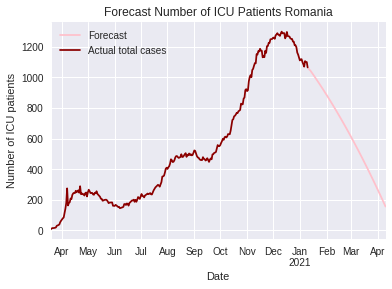

In [ ]:
forecast_ICU.plot(label = 'Forecast', color='pink')
dfRomania_ICU.plot(color='darkred', label = 'Actual total cases')
plt.title('Forecast Number of ICU Patients Romania')
plt.ylabel('Number of ICU patients')
plt.xlabel('Date')
plt.legend()
plt.show()


# 2.1 Italy - Total Infections

In [ ]:
dfItaly=df[df["location"] == "Italy"]
dfItaly.head()

,location,total_cases,total_deaths,new_deaths,icu_patients
date,,,,,
2020-01-31,Italy,2.0,NaN,NaN,NaN
2020-02-01,Italy,2.0,NaN,NaN,NaN
2020-02-02,Italy,2.0,NaN,NaN,NaN
2020-02-03,Italy,2.0,NaN,NaN,NaN
2020-02-04,Italy,2.0,NaN,NaN,NaN


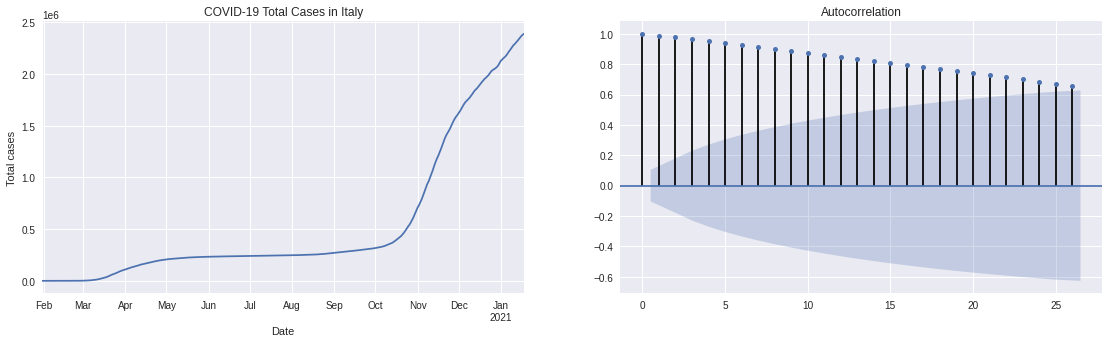

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(19,5)) 
dfItaly['total_cases'].plot(ax=ax[0], title='COVID-19 Total Cases in Italy', xlabel='Date', ylabel='Total cases')
sm.graphics.tsa.plot_acf(dfItaly['total_cases'], ax=ax[1])
plt.show()

In [ ]:
adf_test(dfItaly['total_cases'])

ADF :  0.9952493011037393
p-value :  0.9942155693963597
number of lags :  12
number of observations used for ADF regression and critical values calculation :  341
critical values : 
	 1% :  -3.449673193310592
	 5% :  -2.8700533746644323
	 10% :  -2.5713055939491403


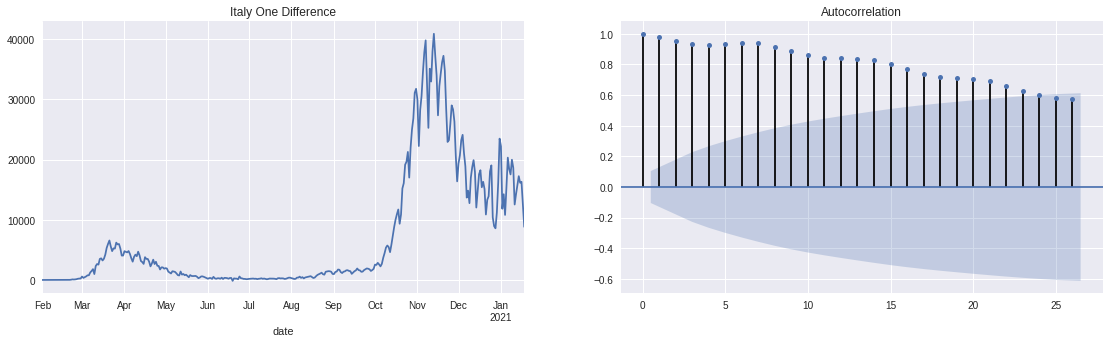

In [ ]:
Italy_one_diff = (dfItaly["total_cases"]).diff().dropna()
fig, ax = plt.subplots(1,2, figsize=(19, 5))
sm.graphics.tsa.plot_acf (Italy_one_diff, ax=ax[1])
Italy_one_diff.plot(ax=ax[0], title="Italy One Difference")
plt.show()

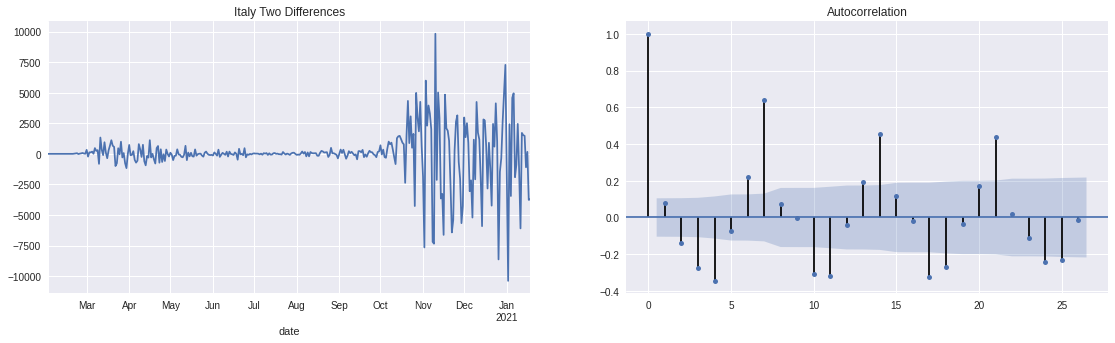

In [ ]:
Italy_two_diff = (Italy_one_diff).diff().dropna()
fig, ax = plt.subplots(1,2, figsize=(19, 5))
sm.graphics.tsa.plot_acf (Italy_two_diff, ax=ax[1])
Italy_two_diff.plot(ax=ax[0], title="Italy Two Differences")
plt.show()

In [ ]:
adf_test(Italy_two_diff)

ADF :  -3.4753627956510242
p-value :  0.008642838064985264
number of lags :  17
number of observations used for ADF regression and critical values calculation :  334
critical values : 
	 1% :  -3.450081345901191
	 5% :  -2.870232621465807
	 10% :  -2.571401168202517


In [ ]:
stepwise_fit = auto_arima(dfItaly['total_cases'], trace=True, seasonal=True, m=7)
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[7]             : AIC=6104.890, Time=1.68 sec
 ARIMA(0,2,0)(0,0,0)[7]             : AIC=6347.421, Time=0.02 sec
 ARIMA(1,2,0)(1,0,0)[7]             : AIC=6153.872, Time=0.44 sec
 ARIMA(0,2,1)(0,0,1)[7]             : AIC=6207.790, Time=0.42 sec
 ARIMA(2,2,2)(0,0,1)[7]             : AIC=6125.010, Time=1.08 sec
 ARIMA(2,2,2)(1,0,0)[7]             : AIC=6108.030, Time=1.55 sec
 ARIMA(2,2,2)(2,0,1)[7]             : AIC=inf, Time=2.90 sec
 ARIMA(2,2,2)(1,0,2)[7]             : AIC=inf, Time=3.23 sec
 ARIMA(2,2,2)(0,0,0)[7]             : AIC=6208.775, Time=0.50 sec
 ARIMA(2,2,2)(0,0,2)[7]             : AIC=6122.183, Time=2.26 sec
 ARIMA(2,2,2)(2,0,0)[7]             : AIC=6108.141, Time=3.12 sec
 ARIMA(2,2,2)(2,0,2)[7]             : AIC=6107.990, Time=3.57 sec
 ARIMA(1,2,2)(1,0,1)[7]             : AIC=6110.767, Time=1.00 sec
 ARIMA(2,2,1)(1,0,1)[7]             : AIC=6119.261, Time=1.18 sec
 ARIMA(3,2,2)(1,0,1)[7]             : AIC=6

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  354
Model:             SARIMAX(4, 2, 3)x(1, 0, [1], 7)   Log Likelihood               -3032.619
Date:                             Sat, 23 Jan 2021   AIC                           6085.238
Time:                                     15:36:25   BIC                           6123.875
Sample:                                          0   HQIC                          6100.614
                                             - 354                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4765      0.072     -6.579      0.000      -0.618      -0.335
ar.L2         -1.1672      0.062    -18.771      0.000      -1.289      -1.045
ar.L3         -0.2062      0.081     -2.535      0.011      -0.366      -0.047
ar.L4         -0.4405      0.041    -10.782      0.000      -0.521      -0.360
ma.L1          0.2401      0.088      2.728      0.006       0.068       0.413
ma.L2          0.8106      0.051     15.867      0.000       0.710       0.911
ma.L3         -0.1459      0.094     -1.551      0.121      -0.330       0.038
ar.S.L7        0.7402      0.042     17.773      0.000       0.659       0.822
ma.S.L7        0.1404      0.066      2.116      0.034       0.010       0.270
sigma2      1.917e+06   8.21e+04     23.360      0.000    1.76e+06    2.08e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               936.00
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):              28.05   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
Italy_train = dfItaly.iloc[:-17]

In [ ]:
Italy_test = dfItaly.iloc[-17:]

In [ ]:
print(Italy_train.shape, Italy_test.shape)

(337, 5) (17, 5)


In [ ]:
model = SARIMAX(Italy_train['total_cases'], order=(4,2,3), seasonal_order =(1,0,1,7))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                         total_cases   No. Observations:                  337
Model:             SARIMAX(4, 2, 3)x(1, 0, [1], 7)   Log Likelihood               -2851.800
Date:                             Sat, 23 Jan 2021   AIC                           5723.600
Time:                                     16:04:41   BIC                           5761.741
Sample:                                 01-31-2020   HQIC                          5738.806
                                      - 01-01-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7453      0.103     -7.209      0.000      -0.948      -0.543
ar.L2         -1.2077      0.100    -12.102      0.000      -1.403      -1.012
ar.L3         -0.4385      0.105     -4.175      0.000      -0.644      -0.233
ar.L4         -0.4048      0.035    -11.577      0.000      -0.473      -0.336
ma.L1          0.5391      0.114      4.730      0.000       0.316       0.763
ma.L2          0.8851      0.098      9.063      0.000       0.694       1.077
ma.L3          0.1606      0.119      1.346      0.178      -0.073       0.394
ar.S.L7        0.8141      0.042     19.422      0.000       0.732       0.896
ma.S.L7        0.1287      0.051      2.543      0.011       0.030       0.228
sigma2      1.637e+06   6.71e+04     24.399      0.000    1.51e+06    1.77e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1588.54
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              21.02   Skew:                            -0.72
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Forecasting the testing period:

In [ ]:
start = len(Italy_train)
end = len(Italy_train) + len(Italy_test) - 1
prediction_Italy = model.predict(start=start, end=end, typ="levels")
print(prediction_Italy)

2021-01-02    2.145002e+06
2021-01-03    2.159694e+06
2021-01-04    2.172180e+06
2021-01-05    2.188529e+06
2021-01-06    2.210307e+06
2021-01-07    2.236784e+06
2021-01-08    2.262445e+06
2021-01-09    2.283564e+06
2021-01-10    2.303278e+06
2021-01-11    2.321113e+06
2021-01-12    2.342487e+06
2021-01-13    2.368040e+06
2021-01-14    2.397417e+06
2021-01-15    2.426283e+06
2021-01-16    2.451283e+06
2021-01-17    2.475179e+06
2021-01-18    2.497651e+06
Freq: D, Name: predicted_mean, dtype: float64


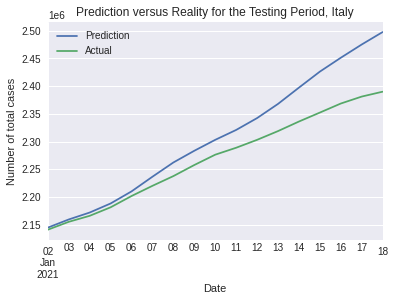

In [ ]:
prediction_Italy.plot(label="Prediction")
Italy_test["total_cases"].plot(label="Actual")
plt.title('Prediction versus Reality for the Testing Period, Italy')
plt.ylabel('Number of total cases')
plt.xlabel('Date')
plt.legend()

In [ ]:
rmseIt = sqrt(mean_squared_error(prediction_Italy, Italy_test['total_cases']))
print('RMSE: ' + str(rmseIt))
meanIt = Italy_test['total_cases'].mean()
print('Mean infections: ' + str(meanIt))
print('Ratio RMSE over Mean infections: ' + str(rmseIt/meanIt))

RMSE: 50757.7046542587
Mean infections: 2269364.529411765
Ratio RMSE over Mean infections: 0.022366483654970782


Real forecast:

In [ ]:
model2 = SARIMAX(dfItaly["total_cases"], order=(4,2,3), seasonal_order =(1,0,1,7))
model2 = model2.fit()
model2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                         total_cases   No. Observations:                  354
Model:             SARIMAX(4, 2, 3)x(1, 0, [1], 7)   Log Likelihood               -3032.619
Date:                             Sat, 23 Jan 2021   AIC                           6085.238
Time:                                     19:34:23   BIC                           6123.875
Sample:                                 01-31-2020   HQIC                          6100.614
                                      - 01-18-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4765      0.072     -6.579      0.000      -0.618      -0.335
ar.L2         -1.1672      0.062    -18.771      0.000      -1.289      -1.045
ar.L3         -0.2062      0.081     -2.535      0.011      -0.366      -0.047
ar.L4         -0.4405      0.041    -10.782      0.000      -0.521      -0.360
ma.L1          0.2401      0.088      2.728      0.006       0.068       0.413
ma.L2          0.8106      0.051     15.867      0.000       0.710       0.911
ma.L3         -0.1459      0.094     -1.551      0.121      -0.330       0.038
ar.S.L7        0.7402      0.042     17.773      0.000       0.659       0.822
ma.S.L7        0.1404      0.066      2.116      0.034       0.010       0.270
sigma2      1.917e+06   8.21e+04     23.360      0.000    1.76e+06    2.08e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               936.00
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):              28.05   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
index_future_dates = pd.date_range(start = '2021-01-19', end = '2021-04-18')
forecast = model2.predict(start = len(dfItaly), end = len(dfItaly)+89, typ = 'levels')
forecast.index = index_future_dates 
print(forecast)

2021-01-19    2.400956e+06
2021-01-20    2.411662e+06
2021-01-21    2.424208e+06
2021-01-22    2.436158e+06
2021-01-23    2.447169e+06
                  ...     
2021-04-14    2.474145e+06
2021-04-15    2.471506e+06
2021-04-16    2.468837e+06
2021-04-17    2.466142e+06
2021-04-18    2.463384e+06
Freq: D, Name: predicted_mean, Length: 90, dtype: float64


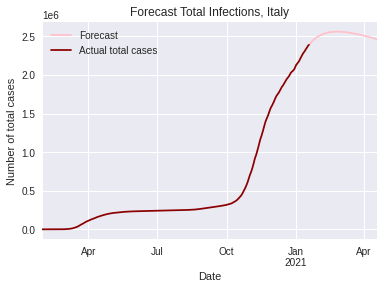

In [ ]:
forecast.plot(label = 'Forecast', color='pink')
dfItaly['total_cases'].plot(color='darkred', label = 'Actual total cases')
plt.title('Forecast Total Infections, Italy')
plt.ylabel('Number of total cases')
plt.xlabel('Date')
plt.legend()
plt.show()

# 3.1 The Netherlands - Total Infections

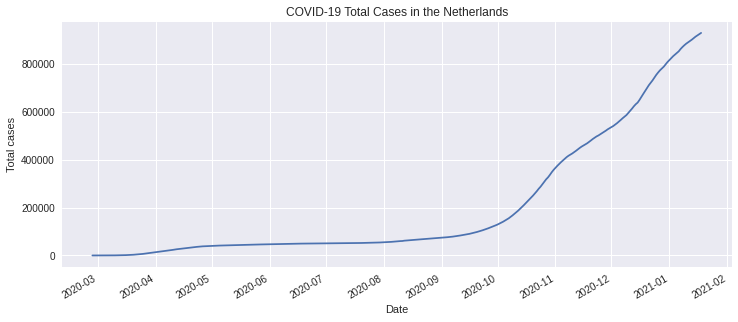

In [ ]:
(df[df.location=='Netherlands']['total_cases']).plot(figsize=(12, 5))
plt.ylabel("Total cases")
plt.xlabel('Date')
plt.title("COVID-19 Total Cases in the Netherlands")
plt.show()

In [ ]:
dfNetherlands=df[df["location"] == "Netherlands"]
dfNetherlands.head()

,location,total_cases,total_deaths,new_deaths,icu_patients
date,,,,,
2020-02-15,Netherlands,NaN,NaN,NaN,NaN
2020-02-23,Netherlands,NaN,NaN,NaN,NaN
2020-02-27,Netherlands,1.0,NaN,NaN,14.0
2020-02-28,Netherlands,1.0,NaN,NaN,15.0
2020-02-29,Netherlands,6.0,NaN,NaN,16.0


In [ ]:
dfNetherlands.shape

(329, 5)

In [ ]:
dfNetherlands["total_cases"].isnull().sum()

2

In [ ]:
dfNetherlands = dfNetherlands.iloc[2:]
dfNetherlands.shape

(327, 5)

In [ ]:
dfNetherlands.head()

,location,total_cases,total_deaths,new_deaths,icu_patients
date,,,,,
2020-02-27,Netherlands,1.0,NaN,NaN,14.0
2020-02-28,Netherlands,1.0,NaN,NaN,15.0
2020-02-29,Netherlands,6.0,NaN,NaN,16.0
2020-03-01,Netherlands,10.0,NaN,NaN,18.0
2020-03-02,Netherlands,18.0,NaN,NaN,17.0


In [ ]:
adf_test(dfNetherlands['total_cases'])

ADF :  1.3962078054603635
p-value :  0.9970968463096792
number of lags :  17
number of observations used for ADF regression and critical values calculation :  309
critical values : 
	 1% :  -3.45169128009473
	 5% :  -2.8709394227049154
	 10% :  -2.5717780602423517


In [ ]:
stepwise_fit = auto_arima(dfNetherlands['total_cases'], trace=True, seasonal=True, m=7)
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[7]             : AIC=4999.197, Time=1.65 sec
 ARIMA(0,2,0)(0,0,0)[7]             : AIC=5080.900, Time=0.02 sec
 ARIMA(1,2,0)(1,0,0)[7]             : AIC=5031.205, Time=0.17 sec
 ARIMA(0,2,1)(0,0,1)[7]             : AIC=5049.506, Time=0.22 sec
 ARIMA(2,2,2)(0,0,1)[7]             : AIC=5001.250, Time=1.30 sec
 ARIMA(2,2,2)(1,0,0)[7]             : AIC=5000.341, Time=1.31 sec
 ARIMA(2,2,2)(2,0,1)[7]             : AIC=inf, Time=2.43 sec
 ARIMA(2,2,2)(1,0,2)[7]             : AIC=inf, Time=2.76 sec
 ARIMA(2,2,2)(0,0,0)[7]             : AIC=5015.115, Time=0.72 sec
 ARIMA(2,2,2)(0,0,2)[7]             : AIC=inf, Time=2.93 sec
 ARIMA(2,2,2)(2,0,0)[7]             : AIC=4999.117, Time=1.99 sec
 ARIMA(1,2,2)(2,0,0)[7]             : AIC=5006.473, Time=0.82 sec
 ARIMA(2,2,1)(2,0,0)[7]             : AIC=5005.170, Time=0.66 sec
 ARIMA(3,2,2)(2,0,0)[7]             : AIC=inf, Time=2.84 sec
 ARIMA(2,2,3)(2,0,0)[7]             : AIC=4991.940, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  327
Model:             SARIMAX(2, 2, 4)x(1, 0, [1, 2], 7)   Log Likelihood               -2479.501
Date:                                Sat, 23 Jan 2021   AIC                           4979.001
Time:                                        16:10:12   BIC                           5016.839
Sample:                                             0   HQIC                          4994.102
                                                - 327                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4791      0.114     -4.207      0.000      -0.702      -0.256
ar.L2          0.2948      0.125      2.361      0.018       0.050       0.540
ma.L1          0.2766      0.117      2.355      0.018       0.046       0.507
ma.L2         -0.5660      0.109     -5.205      0.000      -0.779      -0.353
ma.L3          0.0704      0.042      1.676      0.094      -0.012       0.153
ma.L4          0.3683      0.029     12.793      0.000       0.312       0.425
ar.S.L7        0.8828      0.050     17.704      0.000       0.785       0.981
ma.S.L7       -0.5386      0.075     -7.142      0.000      -0.686      -0.391
ma.S.L14       0.0243      0.044      0.552      0.581      -0.062       0.110
sigma2      2.514e+05   1.09e+04     23.044      0.000     2.3e+05    2.73e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              1045.05
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):              58.80   Skew:                             0.56
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
Netherlands_train = dfNetherlands.iloc[:-17]

In [ ]:
Netherlands_test = dfNetherlands.iloc[-17:]

In [ ]:
print(Netherlands_train.shape, Netherlands_test.shape)

(310, 5) (17, 5)


In [ ]:
model = SARIMAX(Netherlands_train['total_cases'], order=(2,2,4), seasonal_order=(1, 0, [1, 2], 7)) 
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                            total_cases   No. Observations:                  310
Model:             SARIMAX(2, 2, 4)x(1, 0, [1, 2], 7)   Log Likelihood               -2331.512
Date:                                Sat, 23 Jan 2021   AIC                           4683.023
Time:                                        16:14:03   BIC                           4720.324
Sample:                                    02-27-2020   HQIC                          4697.938
                                         - 01-01-2021                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2254      0.082     -2.754      0.006      -0.386      -0.065
ar.L2          0.4669      0.067      6.952      0.000       0.335       0.599
ma.L1          0.0451      0.081      0.558      0.577      -0.113       0.204
ma.L2         -0.6957      0.062    -11.224      0.000      -0.817      -0.574
ma.L3          0.1460      0.031      4.773      0.000       0.086       0.206
ma.L4          0.4711      0.032     14.883      0.000       0.409       0.533
ar.S.L7        0.9149      0.048     19.128      0.000       0.821       1.009
ma.S.L7       -0.6573      0.078     -8.470      0.000      -0.809      -0.505
ma.S.L14       0.0504      0.041      1.219      0.223      -0.031       0.132
sigma2      2.184e+05   9099.948     24.001      0.000    2.01e+05    2.36e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1043.90
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              47.26   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start = len(Netherlands_train)
end = len(Netherlands_train) + len(Netherlands_test) - 1
prediction_Netherlands = model.predict(start=start, end=end, typ="levels")
print(prediction_Netherlands)

2021-01-02    825112.988954
2021-01-03    834059.488045
2021-01-04    842050.359001
2021-01-05    849147.032419
2021-01-06    857688.654380
2021-01-07    866796.718103
2021-01-08    875540.964129
2021-01-09    883928.482739
2021-01-10    892505.521078
2021-01-11    900035.284409
2021-01-12    907027.502360
2021-01-13    915258.852912
2021-01-14    924102.607437
2021-01-15    932456.250066
2021-01-16    940595.278173
2021-01-17    948868.319667
2021-01-18    956239.136507
Freq: D, Name: predicted_mean, dtype: float64


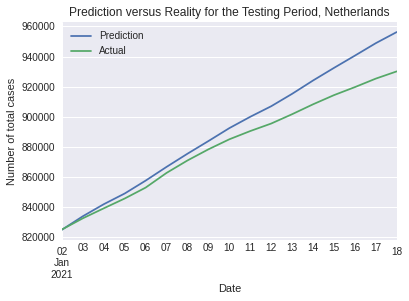

In [ ]:
prediction_Netherlands.plot(label="Prediction")
Netherlands_test["total_cases"].plot(label="Actual")
plt.title('Prediction versus Reality for the Testing Period, Netherlands')
plt.ylabel('Number of total cases')
plt.xlabel('Date')
plt.legend()

In [ ]:
rmseNl = sqrt(mean_squared_error(prediction_Netherlands, Netherlands_test['total_cases']))
print('RMSE: ' + str(rmseNl))
meanNl = Netherlands_test['total_cases'].mean()
print('Mean infections: ' + str(meanNl))
print('Ratio RMSE over Mean infections: ' + str(rmseNl/meanNl))

RMSE: 12863.23586734097
Mean infections: 881136.1764705882
Ratio RMSE over Mean infections: 0.014598465266589061


In [ ]:
model2 = SARIMAX(dfNetherlands["total_cases"], order=(2,2,4), seasonal_order=(1, 0, [1, 2], 7)) 
model2 = model2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                            total_cases   No. Observations:                  327
Model:             SARIMAX(2, 2, 4)x(1, 0, [1, 2], 7)   Log Likelihood               -2479.501
Date:                                Sat, 23 Jan 2021   AIC                           4979.001
Time:                                        16:15:32   BIC                           5016.839
Sample:                                    02-27-2020   HQIC                          4994.102
                                         - 01-18-2021                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4791      0.114     -4.207      0.000      -0.702      -0.256
ar.L2          0.2948      0.125      2.361      0.018       0.050       0.540
ma.L1          0.2766      0.117      2.355      0.018       0.046       0.507
ma.L2         -0.5660      0.109     -5.205      0.000      -0.779      -0.353
ma.L3          0.0704      0.042      1.676      0.094      -0.012       0.153
ma.L4          0.3683      0.029     12.793      0.000       0.312       0.425
ar.S.L7        0.8828      0.050     17.704      0.000       0.785       0.981
ma.S.L7       -0.5386      0.075     -7.142      0.000      -0.686      -0.391
ma.S.L14       0.0243      0.044      0.552      0.581      -0.062       0.110
sigma2      2.514e+05   1.09e+04     23.044      0.000     2.3e+05    2.73e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              1045.05
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):              58.80   Skew:                             0.56
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
index_future_dates = pd.date_range(start = '2021-01-19', end = '2021-04-18')
forecast = model2.predict(start = len(dfNetherlands), end = len(dfNetherlands)+89, typ = 'levels')
forecast.index = index_future_dates 
print(forecast)

2021-01-19    9.345754e+05
2021-01-20    9.397895e+05
2021-01-21    9.461893e+05
2021-01-22    9.518296e+05
2021-01-23    9.571499e+05
                  ...     
2021-04-14    1.173320e+06
2021-04-15    1.174712e+06
2021-04-16    1.175955e+06
2021-04-17    1.177099e+06
2021-04-18    1.178202e+06
Freq: D, Name: predicted_mean, Length: 90, dtype: float64


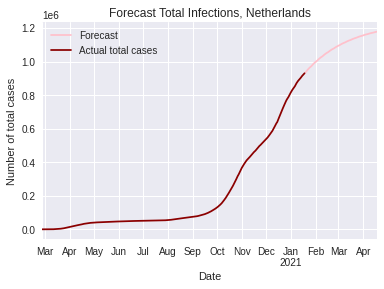

In [ ]:
forecast.plot(label = 'Forecast', color='pink')
dfNetherlands['total_cases'].plot(color='darkred', label = 'Actual total cases')
plt.title('Forecast Total Infections, Netherlands')
plt.ylabel('Number of total cases')
plt.xlabel('Date')
plt.legend()
plt.show()

# 4.1 Sweden - Total Infections

In [ ]:
dfSweden=df[df["location"] == "Sweden"]
dfSweden.head()

,location,total_cases,total_deaths,new_deaths,icu_patients
date,,,,,
2020-02-01,Sweden,1.0,NaN,NaN,NaN
2020-02-02,Sweden,1.0,NaN,NaN,NaN
2020-02-03,Sweden,1.0,NaN,NaN,NaN
2020-02-04,Sweden,1.0,NaN,NaN,NaN
2020-02-05,Sweden,1.0,NaN,NaN,NaN


In [ ]:
dfSweden.tail()

,location,total_cases,total_deaths,new_deaths,icu_patients
date,,,,,
2021-01-14,Sweden,518783.0,10185.0,351.0,NaN
2021-01-15,Sweden,523486.0,10323.0,138.0,NaN
2021-01-16,Sweden,523486.0,10323.0,0.0,NaN
2021-01-17,Sweden,523486.0,10323.0,0.0,NaN
2021-01-18,Sweden,523486.0,10323.0,0.0,NaN


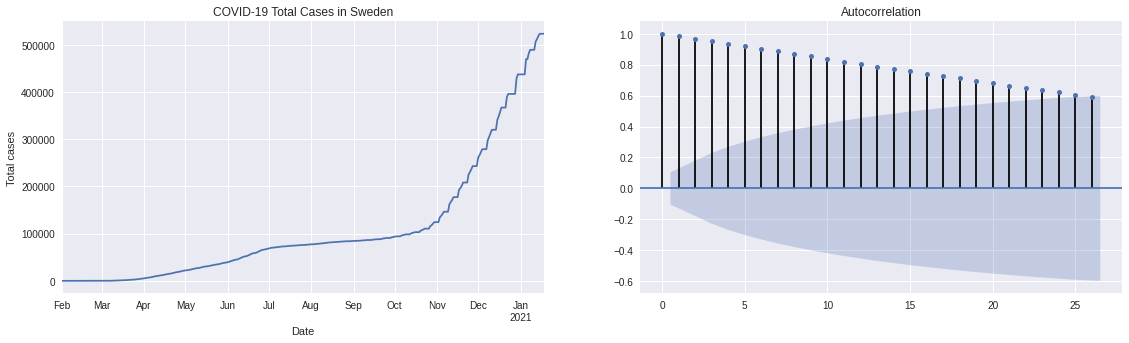

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(19,5)) 
# This code makes the two graphs appear next to each other(it will apear on 1 row, and 2 columns)
# Then we specify the ax for each graph, to decide which one appears first
dfSweden['total_cases'].plot(ax=ax[0], title='COVID-19 Total Cases in Sweden', xlabel='Date', ylabel='Total cases')
sm.graphics.tsa.plot_acf(dfSweden['total_cases'], ax=ax[1])
plt.show()

Run augmented Dicky Fuller test to check for stationarity:

In [ ]:
def adf_test(dataset):    ##AIC chooses nr. of lags so the criteria is minimized
    dickeyfuller = adfuller(dataset, autolag="AIC")
    print("ADF : ", dickeyfuller[0])
    print("p-value : ", dickeyfuller[1])
    print("number of lags : ", dickeyfuller[2])
    print("number of observations used for ADF regression and critical values calculation : ", dickeyfuller[3])
    print("critical values : ")
    for key, val in dickeyfuller[4].items():
        print("\t", key, ": ", val)

In [ ]:
adf_test(dfSweden['total_cases'])

ADF :  -0.5789114315191815
p-value :  0.8756763347337645
number of lags :  14
number of observations used for ADF regression and critical values calculation :  338
critical values : 
	 1% :  -3.449846029628477
	 5% :  -2.870129281376164
	 10% :  -2.5713460670144603


The p-value is very high, suggesting that the data is not stationary and so it needs to be differenced in order to achieve stationarity. Even though this is done automatically by "auto_arima", we still use real data for Sweden to illustrate what the differencing looks like.

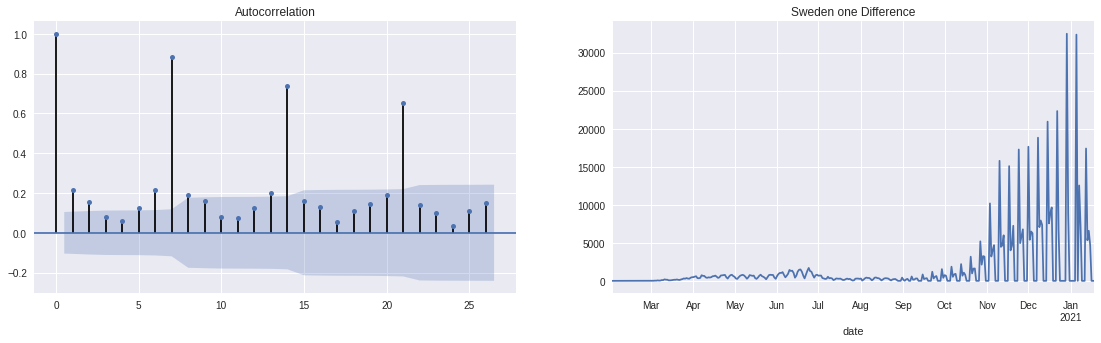

In [ ]:
Sweden_one_diff = (dfSweden['total_cases']).diff().dropna()
fig, ax = plt.subplots(1,2,figsize=(19,5))
sm.graphics.tsa.plot_acf(Sweden_one_diff, ax=ax[0])
Sweden_one_diff.plot(ax=ax[1], title='Sweden one Difference')
plt.show()

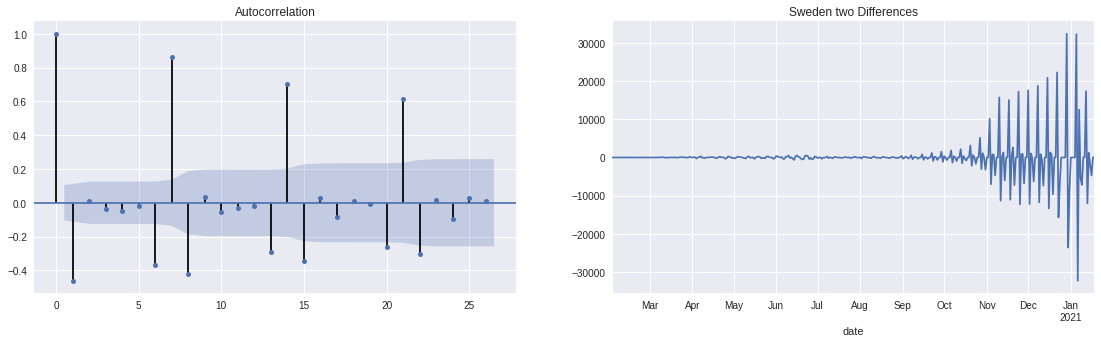

In [ ]:
Sweden_two_diff = (Sweden_one_diff).diff().dropna()

fig, ax = plt.subplots(1,2,figsize=(19,5))
sm.graphics.tsa.plot_acf(Sweden_two_diff, ax=ax[0])
Sweden_two_diff.plot(ax=ax[1], title='Sweden two Differences')
plt.show()

In [ ]:
adf_test(Sweden_two_diff)

ADF :  -4.275767620904455
p-value :  0.0004891480085391309
number of lags :  16
number of observations used for ADF regression and critical values calculation :  334
critical values : 
	 1% :  -3.450081345901191
	 5% :  -2.870232621465807
	 10% :  -2.571401168202517


The P-value is now smaller than 0.05, so we are able to reject the null hypothesis of unit root(non-stationarity). 

# AutoRegression(AR) method:

The ADF test above suggests that after two differences, the data is stationary. Stationarity is a necessary condition for using the AuroRegression method, so we will perform the forecast using the "Sweden_two_diff" data.

We inspect the Partial Autocorrelation graph, in orer to determine how many past observations have an effect on a given observation. The Partial Autocorrelation coefficient captures the direct effect that a past observation has on a current observation. By contrast, the Autocorrelation coefficient captures both the direct and indirect effects. For this reason, we are more interested in the PACF graph. 

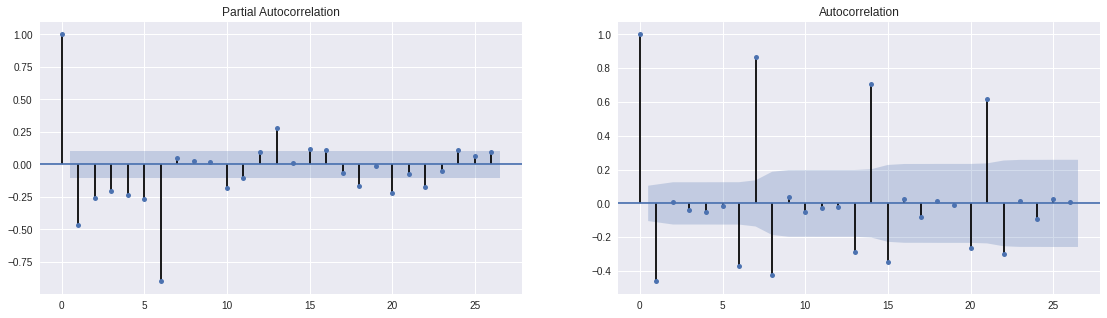

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(19,5))
sm.graphics.tsa.plot_pacf(Sweden_two_diff, ax=ax[0])
sm.graphics.tsa.plot_acf(Sweden_two_diff, ax=ax[1])
plt.show()

The PACF graph above shows that the past 6 observations have the highest effect on a current observation.

Then we divide the data into a training and a testing section:

In [ ]:
Sweden_train_AR = Sweden_two_diff.iloc[:-15]
Sweden_test_AR = Sweden_two_diff.iloc[-15:]
print(Sweden_two_diff.shape, Sweden_train_AR.shape, Sweden_test_AR.shape) # To chcek if selection was done correctly

(351,) (336,) (15,)


Then we fit the AutoRegression model to the training part of the data, using 6 lags (that correspond to the last 6 observations).

In [ ]:
modelSw_AR = AutoReg(Sweden_train_AR, lags=6).fit()
print(modelSw_AR.summary())

                            AutoReg Model Results                             
Dep. Variable:            total_cases   No. Observations:                  336
Model:                     AutoReg(6)   Log Likelihood               -2751.483
Method:               Conditional MLE   S.D. of innovations           1011.197
Date:                Sat, 23 Jan 2021   AIC                             13.886
Time:                        14:42:24   BIC                             13.978
Sample:                    02-09-2020   HQIC                            13.923
                         - 01-03-2021                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept        136.2265     55.728      2.444      0.015      27.002     245.451
total_cases.L1    -0.9845      0.017    -58.688      0.000      -1.017      -0.952
total_cases.L2    -1.0472      0.020

After inspecting the P-values of the coefficients, we observe that they are all statistically significant (the P-values are smaller than 0.05). Therefore, we keep the model in this form. 

In [ ]:
predSw_AR = modelSw_AR.predict(start = len(Sweden_train_AR), end = len(Sweden_two_diff)-1, dynamic=False)

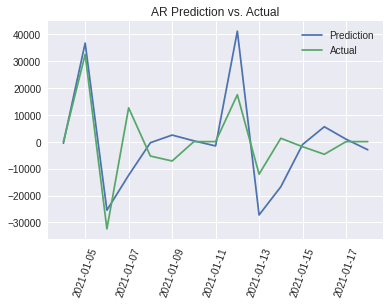

In [ ]:
plt.plot(predSw_AR, label='Prediction')
plt.plot(Sweden_test_AR, label='Actual')
plt.xticks(rotation=70)
plt.title('AR Prediction vs. Actual')
plt.legend()
plt.show()

In [ ]:
rmseSw_AR = sqrt(mean_squared_error(Sweden_test_AR, predSw_AR))
print('RMSE: ' + str(rmseSw_AR))
meanSw_AR = Sweden_test_AR.mean()
print('Mean: ' + str(meanSw_AR))
print('Ratio RMSE over Mean: ' + str(rmseSw_AR/meanSw_AR))

RMSE: 11649.346884384036
Mean: 0.0


ZeroDivisionError: ignored

We cannot obtain the ratio of interest in this case, because the mean is 0, but we can simply compare the RMSE to the mean. The RMSE is very high, so we conclude that the prediction is bad. For this reason, we do not continue with forecasting, and we turn towards the ARIMA method instead. 

# ARIMA Model

In [ ]:
stepwise_fit = auto_arima(dfSweden['total_cases'], trace=True, supress_warnings=True)
stepwise_fit.summary() 

In [ ]:
Sweden_train = dfSweden.iloc[:-15]
Sweden_test = dfSweden.iloc[-15:]
print(dfSweden.shape, Sweden_train.shape, Sweden_test.shape)

In [ ]:
modelSw = ARIMA(Sweden_train['total_cases'], order=(0,2,1)) 
modelSw = modelSw.fit()
modelSw.summary()

In [ ]:
starting_index = len(Sweden_train)
ending_index = len(Sweden_train) + len(Sweden_test) - 1 

predictionSw = modelSw.predict(start = starting_index, end = ending_index, typ = 'levels')
predictionSw.index = dfSweden.index[starting_index : ending_index+1]
print(len(predictionSw))
print(predictionSw)
# So the starting date for the prediction is 2020-01-04, and the ending date is 2021-01-18 (the last day 
# containing data)

In [ ]:
predictionSw.plot(label='Prediction')
Sweden_test['total_cases'].plot(label='Actual')
plt.title('Prediction versus Reality for the Testing Period, Sweden')
plt.ylabel('Number of total cases')
plt.xlabel('Date')
plt.legend()
plt.show()

In [ ]:
rmseSw = sqrt(mean_squared_error(prediction,Sweden_test['total_cases']))
print('RMSE: ' + str(rmseSw))
meanSw = Sweden_test['total_cases'].mean()
print('Mean: ' + str(meanSw))
print('Ratio RMSE over Mean: ' + str(rmseSw/meanSw))

The smaller the root mean squared error is, relative to the daily mean of total infections, the better the prediction is. In this case, the ratio is substantially high, so the prediction is not very good. However, it is better than with AutoRegression method, so we will we proceed to forecast the total infections for a period of 3 months, starting from 19.01.2020. First, we re-train the model on the entire available data: 

In [ ]:
modelSw2 = ARIMA(dfSweden['total_cases'], order=(0,2,1)) 
modelSw2 = modelSw2.fit()
modelSw2.summary()

In [ ]:
index_future_dates = pd.date_range(start = '2021-01-19', end = '2021-04-18')
forecast = modelSw2.predict(start = len(dfSweden), end = len(dfSweden)+89, typ = 'levels')
forecast.index = index_future_dates 
print(forecast)

In [ ]:
forecast.plot(label = 'Forecast', color='pink')
dfSweden['total_cases'].plot(color='darkred', label = 'Actual total cases')
plt.title('Forecast Total Infections, Sweden')
plt.ylabel('Number of total cases')
plt.xlabel('Date')
plt.legend()
plt.show()

## Sensitivity analysis (0.5 points)

If you do a theory notebook, program different values for the parameters, use different functional forms and solve your model again for these new values. Show that the outcomes are robust to such changes.

If you are using data, how sensitive are your results to outliers in the data, different choices when cleaning the data, different functional forms for the relations that you estimate.

For the sensitivity analysis, we investigate what happens if we increase the testing period that we use for testing the model (and therefore decrease the length of the training period). Thus, the initial testing period of 15 days will be changed to 45 days. We repeat the analysis for the 5 countries. 

## 1.1 Romania - Total Infections

In [34]:
Romania_train_s = dfRomania.iloc[:-45]
Romania_test_s = dfRomania.iloc[-45:]

In [35]:
print(dfRomania.shape, Romania_train_s.shape, Romania_test_s.shape)

(328, 3) (283, 3) (45, 3)


In [41]:
modelRo_s = ARIMA(Romania_train_s['total_cases'], order=(5,2,2)) 
modelRo_s = modelRo_s.fit()
modelRo_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D2.total_cases   No. Observations:                  281
Model:                 ARIMA(5, 2, 2)   Log Likelihood               -2134.243
Method:                       css-mle   S.D. of innovations            477.193
Date:                Sat, 23 Jan 2021   AIC                           4286.486
Time:                        19:53:52   BIC                           4319.231
Sample:                    02-28-2020   HQIC                          4299.619
                         - 12-04-2020                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.6540     11.500      1.883      0.060      -0.886      44.194
ar.L1.D2.total_cases     0.3713      0.108      3.437      0.001       0.160       0.583
ar.L2.D2.total_cases    -0.8779      0.079    -11.133      0.000      -1.032      -0.723
ar.L3.D2.total_cases    -0.0789      0.104     -0.763      0.446      -0.282       0.124
ar.L4.D2.total_cases    -0.3902      0.060     -6.471      0.000      -0.508      -0.272
ar.L5.D2.total_cases    -0.4404      0.085     -5.180      0.000      -0.607      -0.274
ma.L1.D2.total_cases    -0.6127      0.116     -5.295      0.000      -0.840      -0.386
ma.L2.D2.total_cases     0.5826      0.088      6.628      0.000       0.410       0.755
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6384           -0.7895j            1.0154           -0.1418
AR.2            0.6384           +0.7895j            1.0154            0.1418
AR.3           -0.1893           -1.0948j            1.1111           -0.2773
AR.4           -0.1893           +1.0948j            1.1111            0.2773
AR.5           -1.7843           -0.0000j            1.7843           -0.5000
MA.1            0.5258           -1.2000j            1.3101           -0.1843
MA.2            0.5258           +1.2000j            1.3101            0.1843
-----------------------------------------------------------------------------
"""

In [42]:
starting_index = len(Romania_train_s)
ending_index = len(Romania_train_s) + len(Romania_test_s) - 1 

predictionRo_s = modelRo_s.predict(start = starting_index, end = ending_index, typ = 'levels')
predictionRo_s.index = dfRomania.index[starting_index : ending_index+1]
print(len(predictionRo_s))
print(predictionRo_s)
# So the starting date for the prediction is 2020-12-05, and the ending date is 2021-01-18 (the last day 
# containing data)

45
date
2020-12-05    507174.698217
2020-12-06    512857.980791
2020-12-07    517773.413193
2020-12-08    522252.001532
2020-12-09    527667.146473
2020-12-10    534912.876983
2020-12-11    542939.096098
2020-12-12    550135.042101
2020-12-13    556072.250012
2020-12-14    561134.936454
2020-12-15    565985.115142
2020-12-16    571656.083421
2020-12-17    578796.526924
2020-12-18    586726.680655
2020-12-19    594115.577006
2020-12-20    600319.841008
2020-12-21    605614.535138
2020-12-22    610751.260480
2020-12-23    616637.107424
2020-12-24    623764.515161
2020-12-25    631636.660966
2020-12-26    639150.745854
2020-12-27    645609.640617
2020-12-28    651170.245941
2020-12-29    656566.888510
2020-12-30    662638.625493
2020-12-31    669797.624145
2021-01-01    677648.125529
2021-01-02    685259.472685
2021-01-03    691950.221379
2021-01-04    697785.278544
2021-01-05    703433.367977
2021-01-06    709677.033750
2021-01-07    716890.386965
2021-01-08    724747.318972
2021-01-09  

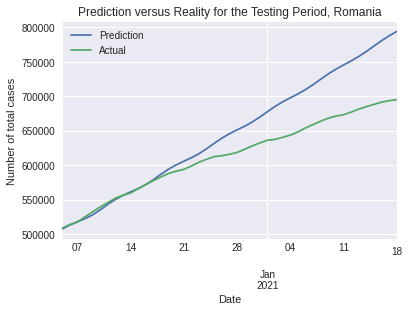

In [43]:
predictionRo_s.plot(label='Prediction')
Romania_test_s['total_cases'].plot(label='Actual')
plt.title('Prediction versus Reality for the Testing Period, Romania')
plt.ylabel('Number of total cases')
plt.xlabel('Date')
plt.legend()

In [44]:
rmseRo_s = sqrt(mean_squared_error(predictionRo_s,Romania_test_s['total_cases']))
print('RMSE: ' + str(rmseRo_s))
meanRo_s = Romania_test_s['total_cases'].mean()
print('Mean infections: ' + str(meanRo_s))
print('Ratio RMSE over Mean infections: ' + str(rmseRo_s/meanRo_s))
print('Old Ratio RMSE over Mean:' + str(rmseRo/meanRo))

RMSE: 46174.413482299235
Mean infections: 612924.4
Ratio RMSE over Mean infections: 0.07533459833268057
Old Ratio RMSE over Mean:0.007506532052424436


The ratio for the longer testing period increased compared to the ratio for the shorter time period, suggesting a poorer prediction over longer time spans. However, the new ratio is still close to 0, so we consider that the prediction still performs well enough.

## 1.2 Romania - ICU Patients

In [ ]:
Romania_train_ICU_s = dfRomania_ICU.iloc[:-45]
Romania_test_ICU_s = dfRomania_ICU.iloc[-45:]
print(dfRomania_ICU.shape, Romania_train_ICU_s.shape, Romania_test_ICU_s.shape)

In [ ]:
modelRo_ICU_s = ARIMA(Romania_train_ICU_s, order=(0,2,4)) 
modelRo_ICU_s = modelRo_ICU_s.fit()
modelRo_ICU_s.summary()

In [ ]:
starting_index = len(Romania_train_ICU_s)
ending_index = len(Romania_train_ICU_s) + len(Romania_test_ICU_s) - 1 

predictionRo_ICU_s = modelRo_ICU_s.predict(start = starting_index, end = ending_index, typ = 'levels')
predictionRo_ICU_s.index = dfRomania_ICU.index[starting_index : ending_index+1]
print(len(predictionRo_ICU_s))
print(predictionRo_ICU_s)
# So the starting date for the prediction is 2020-11-26, and the ending date is 2021-01-10 (the last day 
# containing data)

In [ ]:
predictionRo_ICU_s.plot(label='Prediction Number of ICU Patients')
Romania_test_ICU_s.plot(label='Actual Number of ICU Patients')
plt.title('Prediction versus Reality for the Testing Period, Romania')
plt.ylabel('Number of ICU patients')
plt.xlabel('Date')
plt.legend()
plt.show()

In [ ]:
rmseRo_ICU_s = sqrt(mean_squared_error(predictionRo_ICU_s,Romania_test_ICU_s))
print('RMSE: ' + str(rmseRo_ICU_s))
meanRo_ICU_s = Romania_test_ICU_s.mean()
print('Mean number of ICU patients: ' + str(meanRo_ICU_s))
print('Ratio RMSE over Mean: ' + str(rmseRo_ICU_s/meanRo_ICU_s))
print('Old Ratio RMSE over Mean:' + str(rmseRo_ICU/meanRo_ICU))

The ratio for the longer testing period increased compared to the ratio for the shorter time period, suggesting a poorer prediction over longer time spans.

## II. Italy

In [ ]:
Italy_train_s = dfItaly.iloc[:-45]
Italy_test_s = dfItaly.iloc[-45:]

In [ ]:
print(Italy_train_s.shape, Italy_test_s.shape)

In [ ]:
modelIt_s = ARIMA(Italy_train_s['total_cases'], order=(4, 2, 3)) 
modelIt_s = modelIt_s.fit()
modelIt_s.summary()

In [ ]:
starting_index = len(Italy_train_s)
ending_index = len(Italy_train_s) + len(Italy_test_s) - 1 

predictionIt_s = modelIt_s.predict(start = starting_index, end = ending_index, typ = 'levels')
predictionIt_s.index = dfItaly.index[starting_index : ending_index+1]
print(len(predictionIt_s))
print(predictionIt_s)

In [ ]:
predictionIt_s.plot(label='Prediction')
Italy_test_s['total_cases'].plot(label='Actual')
plt.title('Prediction versus Reality for the Testing Period, Italy')
plt.ylabel('Number of total cases')
plt.xlabel('Date')
plt.legend()

In [ ]:
rmseIt_s = sqrt(mean_squared_error(predictionIt_s,Italy_test_s['total_cases']))
print('RMSE: ' + str(rmseIt_s))
meanIt_s = Italy_test_s['total_cases'].mean()
print('Mean: ' + str(meanIt_s))
print('Ratio RMSE over Mean: ' + str(rmseIt_s/meanIt_s))

## III. The Netherlands



In [ ]:
Netherlands_train_s = dfNetherlands.iloc[:-45]
Netherlands_test_s = dfNetherlands.iloc[-45:]

In [ ]:
print(Netherlands_train_s.shape, Netherlands_test_s.shape)

In [ ]:
modelNl_s = ARIMA(Netherlands_train_s['total_cases'], order=(2,2,2)) 
modelNl_s = modelNl_s.fit()
modelNl_s.summary()

In [ ]:
starting_index = len(Netherlands_train_s)
ending_index = len(Netherlands_train_s) + len(Netherlands_test_s) - 1 

predictionNl_s = modelNl_s.predict(start = starting_index, end = ending_index, typ = 'levels')
predictionNl_s.index = dfNetherlands.index[starting_index : ending_index+1]
print(len(predictionNl_s))
print(predictionNl_s)

In [ ]:
predictionNl_s.plot(label='Prediction')
Netherlands_test_s['total_cases'].plot(label='Actual')
plt.title('Prediction versus Reality for the Testing Period, Netherlands')
plt.ylabel('Number of total cases')
plt.xlabel('Date')
plt.legend()

In [ ]:
rmseNl_s = sqrt(mean_squared_error(predictionNl_s,Netherlands_test_s['total_cases']))
print('RMSE: ' + str(rmseNl_s))
meanNl_s = Netherlands_test_s['total_cases'].mean()
print('Mean: ' + str(meanNl_s))
print('Ratio RMSE over Mean: ' + str(rmseNl_s/meanNl_s))

## IV. Sweden

In [ ]:
Sweden_train_s = dfSweden.iloc[:-45]
Sweden_test_s = dfSweden.iloc[-45:]

In [ ]:
print(Sweden_train_s.shape, Sweden_test_s.shape)

In [ ]:
modelSw_s = ARIMA(Sweden_train_s['total_cases'], order=(0,2,1)) 
modelSw_s = modelSw_s.fit()
modelSw_s.summary()

In [ ]:
starting_index = len(Sweden_train_s)
ending_index = len(Sweden_train_s) + len(Sweden_test_s) - 1 

predictionSw_s = modelSw_s.predict(start = starting_index, end = ending_index, typ = 'levels')
predictionSw_s.index = dfSweden.index[starting_index : ending_index+1]
print(len(predictionSw_s))
print(predictionSw_s)
# So the starting date for the prediction is 2020-12-05, and the ending date is 2021-01-18 (the last day 
# containing data)

In [ ]:
predictionSw_s.plot(label='Prediction')
Sweden_test_s['total_cases'].plot(label='Actual')
plt.title('Prediction versus Reality for the Testing Period, Sweden')
plt.ylabel('Number of total cases')
plt.xlabel('Date')
plt.legend()

In [ ]:
rmseSw_s = sqrt(mean_squared_error(predictionSw_s,Sweden_test_s['total_cases']))
print('RMSE: ' + str(rmseSw_s))
meanSw_s = Sweden_test_s['total_cases'].mean()
print('Mean: ' + str(meanSw_s))
print('Ratio RMSE over Mean: ' + str(rmseSw_s/meanSw_s))

We can observe from the above graph that, for a longer time period (of 45 days), the prediction is substantially more accurate than for a short time period (of 15 days). This is confirmed by the ratio of the root mean squared error over the mean of infections during the testing period. This ratio is very low compared to the initial analysis. It is now very close to 0, suggesting that the model works well for predictions over longer time horizons. 

## Discussion and conclusion (0.5 points)

What did you find in the analysis above; what is the answer to the question you started out with.

What are weaknesses of your approach that can be improved upon in future research (e.g. in your thesis).


One of the main drawbacks of the ARIMA method is that it only considers predictions of linear patterns. In other words, it is not capable of predicting possible unusual turning points. In the future analysis, a more complex prediction methods could be implemented in order to overcome this (e.g. regression analysis).

Further, as the sensitivity analysis highlighted, the prediction quality depends on the length of testing period.In the case of Romania, the ARIMA prediction still performs well enough with a testing period of 45 days. The RMSE/mean ratio increases for both Italy and the Netherlands with increasing the testing period. In the case of Sweden however, the prediction seems to perform substantially better for the longer time period (45 days). However, overall, the shorter the testing period, the more accurate the prediction is, so it is important to mention that for a testing period of 90 days, the forecast will not be as accurate as the RMSE/mean ratio (calculated for testing periods of 15 and 45 days) shows. 
